<a href="https://colab.research.google.com/github/pchlenski/gda_project/blob/main/experiments/Observing_statistic_distribution_for_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/pchlenski/gda_project/
!cd gda_project && git pull
!pip install fcit

from gda_project.utils.scm import *
from gda_project.utils.independence import *
from gda_project.utils.embed import *

Cloning into 'gda_project'...
remote: Enumerating objects: 207, done.
remote: Counting objects: 100% (207/207), done.
remote: Compressing objects: 100% (172/172), done.
remote: Total 207 (delta 135), reused 49 (delta 29), pack-reused 0
Receiving objects: 100% (207/207), 33.97 KiB | 8.49 MiB/s, done.
Resolving deltas: 100% (135/135), done.
Already up to date.


In [ ]:
# Colab imports
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Environmental variables
DD = '/content/drive/My Drive/notebooks/4995/data/' # data dir

Mounted at /content/drive


# Performance in reduced space


Based on the results in the 'distribution of test statistics' notebook, we chose to go with the independence test called `independent`. It is more interpretable than `fcit` and substantially faster while still having a nice bimodal distribution of test statistics.

Now we try this on different reduced dimensionalities.

In [ ]:
results = pd.DataFrame(columns=[
    "dataset",
    "embedding",
    "trial",
    "x",
    "y",
    "z",
    "statistic",
    "latent",
    "independent",
    "all_correct"
])

N_DIMS = 3
N_NEIGHBORS = 5 # todo: vary this
THRESHOLD = .2

for i, dataset_generator in enumerate([generate_unconfounded, generate_dependent, generate_confounded]):
    # We know something about the independence structure:
    if i < 1:
        true_n_independent = 6
    else:
        true_n_independent = 4
    for k, embedding in enumerate([run_pca, run_isomap, run_lle, run_laplacian]):
        for trial in range(100):
            try:
                # This part is mostly the same as the previous notebook, 'distribution of test statistics'
                print(i,k,trial)

                latent, observable, Y = dataset_generator(n=N_DIMS)
                reduced = embedding(observable, n_neighbors=N_NEIGHBORS, n_dims=N_DIMS)
                trial_results = test_independences(reduced, test=independent, return_statistics=True)
                latent_results = test_independences(latent, test=independent, return_statistics=True)

                # Now we want to test independences
                n_independent = len([1 for result in trial_results if result[3] < THRESHOLD])

                # TODO: add check that we have (x,y | 0) and (x,y | z) as our independences

                for result, latent_result in zip(trial_results, latent_results):
                    x, y, z, statistic = result
                    _, _, _, latent_statistic = latent_result
                    results = results.append({
                        "dataset" : i,
                        "embedding" : k,
                        "trial" : trial,
                        "x" : x, "y" : y, "z" : z,
                        "statistic" : statistic,
                        "independent" : statistic < THRESHOLD,
                        "latent" : latent_statistic,
                        "all_correct" : n_independent == true_n_independent
                    }, ignore_index=True)
            # Sometimes math errors happen
            except Exception as e:
                print(e)
            

            

0 0 0
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 137.31it/s]


0 0 1
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 188.98it/s]


0 0 2
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 102.46it/s]


0 0 3
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 101.55it/s]


0 0 4
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 86.96it/s]

0 0 5
precheck
check1
check2
check3
check4



100%|██████████| 3/3 [00:00<00:00, 76.94it/s]


0 0 6
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 211.52it/s]


0 0 7
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 85.47it/s]


0 0 8
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 63.05it/s]


0 0 9
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 68.59it/s]


0 0 10
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 95.21it/s]

0 0 11
precheck
check1
check2
check3
check4



100%|██████████| 3/3 [00:00<00:00, 150.78it/s]


0 0 12
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 175.83it/s]

0 0 13
precheck
check1
check2
check3
check4



100%|██████████| 3/3 [00:00<00:00, 173.13it/s]


0 0 14
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 77.88it/s]


0 0 15
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 387.04it/s]


0 0 16
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 161.92it/s]


0 0 17
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 351.52it/s]


0 0 18
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 396.57it/s]


0 0 19
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 373.66it/s]


0 0 20
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 226.10it/s]


0 0 21
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 262.72it/s]


0 0 22
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 229.36it/s]


0 0 23
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 138.78it/s]


0 0 24
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 93.69it/s]

0 0 25
precheck


check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 86.03it/s]


0 0 26
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 152.94it/s]


0 0 27
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 94.55it/s]


0 0 28
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 139.24it/s]


0 0 29
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 157.68it/s]


0 0 30
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 148.81it/s]


0 0 31
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 157.69it/s]


0 0 32
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 182.31it/s]


0 0 33
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 126.53it/s]


0 0 34
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 188.94it/s]


0 0 35
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 374.83it/s]


0 0 36
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 308.93it/s]


0 0 37
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 403.61it/s]


0 0 38
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 303.78it/s]


0 0 39
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 161.52it/s]


0 0 40
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 274.50it/s]


0 0 41
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 158.85it/s]


0 0 42
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 189.75it/s]


0 0 43
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 174.12it/s]


0 0 44
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 345.90it/s]


0 0 45
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 188.02it/s]


0 0 46
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 403.13it/s]


0 0 47
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 388.45it/s]


0 0 48
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 409.17it/s]


0 0 49
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 229.88it/s]


0 0 50
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 348.93it/s]


0 0 51
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 215.12it/s]


0 0 52
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 151.56it/s]


0 0 53
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 206.11it/s]


0 0 54
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 405.26it/s]


0 0 55
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 350.38it/s]


0 0 56
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 328.72it/s]


0 0 57
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 352.41it/s]


0 0 58
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 204.20it/s]


0 0 59
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 240.09it/s]


0 0 60
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 138.43it/s]


0 0 61
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 410.01it/s]


0 0 62
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 409.65it/s]


0 0 63
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 142.65it/s]


0 0 64
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 339.15it/s]


0 0 65
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 161.03it/s]


0 0 66
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 342.44it/s]


0 0 67
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 326.25it/s]


0 0 68
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 258.37it/s]


0 0 69
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 272.68it/s]


0 0 70
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 321.91it/s]


0 0 71
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 309.53it/s]


0 0 72
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 284.98it/s]


0 0 73
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 384.22it/s]


0 0 74
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 114.38it/s]


0 0 75
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 194.36it/s]


0 0 76
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 331.99it/s]


0 0 77
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 117.74it/s]


0 0 78
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 179.57it/s]


0 0 79
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 217.22it/s]


0 0 80
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 230.26it/s]


0 0 81
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 202.22it/s]


0 0 82
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 191.11it/s]


0 0 83
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 236.62it/s]


0 0 84
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 172.37it/s]


0 0 85
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 185.49it/s]


0 0 86
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 142.57it/s]


0 0 87
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 262.45it/s]


0 0 88
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 259.20it/s]


0 0 89
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 151.30it/s]


0 0 90
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 156.63it/s]


0 0 91
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 190.19it/s]


0 0 92
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 252.90it/s]


0 0 93
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 135.45it/s]


0 0 94
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 216.84it/s]


0 0 95
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 224.57it/s]


0 0 96
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 234.43it/s]


0 0 97
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 159.91it/s]


0 0 98
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 239.22it/s]


0 0 99
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 220.93it/s]


0 1 0
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 235.12it/s]


0 1 1
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 219.47it/s]


0 1 2
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 214.63it/s]


0 1 3
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 361.54it/s]


0 1 4
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 222.95it/s]


0 1 5
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 186.37it/s]


0 1 6
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 353.65it/s]


0 1 7
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 342.46it/s]


0 1 8
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 235.09it/s]


0 1 9
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 285.92it/s]


0 1 10
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 258.81it/s]


0 1 11
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 231.16it/s]


0 1 12
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 248.17it/s]


0 1 13
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 170.14it/s]


0 1 14
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 190.74it/s]


0 1 15
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 177.78it/s]


0 1 16
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 220.68it/s]


0 1 17
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 110.55it/s]


0 1 18
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 189.01it/s]


0 1 19
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 137.89it/s]


0 1 20
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 370.13it/s]


0 1 21
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 211.80it/s]


0 1 22
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 326.24it/s]


0 1 23
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 358.47it/s]


0 1 24
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 425.77it/s]


0 1 25
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 156.52it/s]


0 1 26
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 179.47it/s]


0 1 27
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 369.04it/s]


0 1 28
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 399.52it/s]


0 1 29
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 409.81it/s]


0 1 30
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 104.91it/s]


0 1 31
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 378.67it/s]


0 1 32
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 160.66it/s]


0 1 33
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 329.63it/s]


0 1 34
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 259.82it/s]


0 1 35
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 149.81it/s]


0 1 36
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 175.63it/s]


0 1 37
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 436.03it/s]


0 1 38
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 214.80it/s]


0 1 39
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 173.86it/s]


0 1 40
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 121.91it/s]


0 1 41
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 249.81it/s]


0 1 42
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 243.43it/s]


0 1 43
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 391.54it/s]


0 1 44
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 242.08it/s]


0 1 45
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 402.51it/s]


0 1 46
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 158.10it/s]


0 1 47
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 256.66it/s]


0 1 48
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 367.87it/s]


0 1 49
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 159.20it/s]


0 1 50
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 290.71it/s]


0 1 51
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 90.53it/s]


0 1 52
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 116.16it/s]


0 1 53
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 386.33it/s]


0 1 54
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 160.93it/s]


0 1 55
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 385.38it/s]


0 1 56
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 207.98it/s]


0 1 57
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 131.43it/s]


0 1 58
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 124.49it/s]


0 1 59
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 367.92it/s]


0 1 60
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 167.09it/s]


0 1 61
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 100.46it/s]


0 1 62
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 135.56it/s]


0 1 63
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 155.83it/s]


0 1 64
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 177.75it/s]


0 1 65
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 273.06it/s]


0 1 66
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 322.49it/s]


0 1 67
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 324.94it/s]


0 1 68
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 78.53it/s]


0 1 69
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 114.29it/s]


0 1 70
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 172.36it/s]


0 1 71
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 333.07it/s]


0 1 72
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 385.62it/s]


0 1 73
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 209.87it/s]


0 1 74
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 121.47it/s]


0 1 75
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 327.06it/s]


0 1 76
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 146.57it/s]


0 1 77
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 208.40it/s]


0 1 78
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 263.16it/s]


0 1 79
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 346.28it/s]


0 1 80
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 296.84it/s]


0 1 81
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 138.18it/s]


0 1 82
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 248.11it/s]


0 1 83
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 247.17it/s]


0 1 84
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 253.43it/s]


0 1 85
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 294.98it/s]


0 1 86
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 187.31it/s]


0 1 87
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 363.72it/s]


0 1 88
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 270.44it/s]


0 1 89
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 199.56it/s]


0 1 90
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 234.97it/s]


0 1 91
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 305.37it/s]


0 1 92
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 333.33it/s]


0 1 93
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 175.43it/s]


0 1 94
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 221.17it/s]


0 1 95
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 256.84it/s]


0 1 96
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 386.74it/s]


0 1 97
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 123.90it/s]


0 1 98
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 254.21it/s]


0 1 99
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 241.60it/s]


0 2 0
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 142.67it/s]


0 2 1
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 329.91it/s]


0 2 2
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 366.84it/s]


0 2 3
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 237.78it/s]


0 2 4
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 204.42it/s]


0 2 5
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 170.46it/s]


0 2 6
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 180.35it/s]


0 2 7
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 193.10it/s]


0 2 8
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 147.40it/s]


0 2 9
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 410.78it/s]


0 2 10
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 350.11it/s]


0 2 11
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 387.18it/s]


0 2 12
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 239.79it/s]


0 2 13
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 180.47it/s]


0 2 14
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 389.37it/s]


0 2 15
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 290.70it/s]


0 2 16
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 148.20it/s]


0 2 17
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 191.60it/s]


0 2 18
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 181.06it/s]


0 2 19
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 314.73it/s]


0 2 20
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 238.47it/s]


0 2 21
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 158.37it/s]


0 2 22
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 370.88it/s]


0 2 23
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 262.26it/s]


0 2 24
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 423.50it/s]


0 2 25
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 291.97it/s]


0 2 26
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 178.51it/s]


0 2 27
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 160.07it/s]


0 2 28
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 320.22it/s]


0 2 29
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 230.89it/s]


0 2 30
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 136.15it/s]


0 2 31
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 180.02it/s]


0 2 32
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 189.56it/s]


0 2 33
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 177.15it/s]


0 2 34
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 445.89it/s]


0 2 35
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 296.84it/s]


0 2 36
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 161.38it/s]


0 2 37
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 178.61it/s]


0 2 38
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 390.30it/s]


0 2 39
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 168.87it/s]


0 2 40
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 303.85it/s]


0 2 41
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 368.34it/s]


0 2 42
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 279.56it/s]


0 2 43
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 388.88it/s]


0 2 44
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 154.76it/s]


0 2 45
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 260.94it/s]


0 2 46
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 209.04it/s]


0 2 47
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 165.81it/s]


0 2 48
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 389.66it/s]


0 2 49
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 243.27it/s]


0 2 50
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 194.11it/s]


0 2 51
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 249.31it/s]


0 2 52
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 277.00it/s]


0 2 53
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 232.88it/s]


0 2 54
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 316.15it/s]


0 2 55
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 168.46it/s]


0 2 56
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 127.19it/s]


0 2 57
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 350.07it/s]


0 2 58
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 197.81it/s]


0 2 59
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 321.76it/s]


0 2 60
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 391.66it/s]


0 2 61
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 194.59it/s]


0 2 62
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 165.07it/s]


0 2 63
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 267.49it/s]


0 2 64
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 370.33it/s]


0 2 65
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 347.25it/s]


0 2 66
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 193.80it/s]


0 2 67
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 151.63it/s]


0 2 68
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 170.56it/s]


0 2 69
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 204.69it/s]


0 2 70
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 252.27it/s]


0 2 71
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 301.94it/s]


0 2 72
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 384.82it/s]


0 2 73
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 399.91it/s]


0 2 74
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 407.85it/s]


0 2 75
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 367.63it/s]


0 2 76
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 240.85it/s]


0 2 77
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 398.18it/s]


0 2 78
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 313.35it/s]


0 2 79
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 160.90it/s]


0 2 80
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 127.53it/s]


0 2 81
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 404.17it/s]


0 2 82
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 135.73it/s]


0 2 83
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 418.33it/s]


0 2 84
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 248.71it/s]


0 2 85
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 200.54it/s]


0 2 86
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 170.30it/s]


0 2 87
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 401.52it/s]


0 2 88
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 207.23it/s]


0 2 89
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 368.67it/s]


0 2 90
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 184.63it/s]


0 2 91
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 276.30it/s]


0 2 92
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 141.33it/s]


0 2 93
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 212.82it/s]


0 2 94
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 168.37it/s]


0 2 95
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 354.13it/s]


0 2 96
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 307.10it/s]


0 2 97
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 335.58it/s]


0 2 98
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 431.41it/s]


0 2 99
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 155.40it/s]


0 3 0
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 344.42it/s]


0 3 1
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 234.36it/s]

0 3

 2
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 141.60it/s]


0 3 3
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 168.73it/s]


0 3 4
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 350.47it/s]


0 3 5
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 205.43it/s]


0 3 6
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 261.17it/s]


0 3 7
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 215.87it/s]


0 3 8
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 240.07it/s]


0 3 9
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 140.98it/s]


0 3 10
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 236.96it/s]


0 3 11
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 136.26it/s]


0 3 12
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 353.14it/s]


0 3 13
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 349.88it/s]


0 3 14
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 353.16it/s]


0 3 15
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 195.85it/s]


0 3 16
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 223.41it/s]


0 3 17
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 104.04it/s]


0 3 18
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 191.37it/s]


0 3 19
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 409.61it/s]


0 3 20
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 275.75it/s]


0 3 21
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 376.91it/s]


0 3 22
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 419.57it/s]


0 3 23
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 178.16it/s]


0 3 24
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 111.72it/s]


0 3 25
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 251.52it/s]


0 3 26
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 132.42it/s]


0 3 27
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 133.18it/s]


0 3 28
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 178.70it/s]


0 3 29
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 320.89it/s]


0 3 30
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 420.51it/s]


0 3 31
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 395.15it/s]


0 3 32
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 315.54it/s]


0 3 33
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 338.81it/s]


0 3 34
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 180.29it/s]


0 3 35
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 458.76it/s]


0 3 36
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 151.30it/s]


0 3 37
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 270.01it/s]


0 3 38
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 452.30it/s]


0 3 39
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 392.37it/s]


0 3 40
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 397.23it/s]


0 3 41
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 105.07it/s]

0 3 42
precheck
check1
check2


check3
check4


100%|██████████| 3/3 [00:00<00:00, 143.36it/s]

0 3 43
precheck
check1
check2


check3
check4


100%|██████████| 3/3 [00:00<00:00, 353.42it/s]


0 3 44
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 191.47it/s]


0 3 45
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 313.34it/s]


0 3 46
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 213.03it/s]


0 3 47
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 334.70it/s]


0 3 48
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 287.52it/s]


0 3 49
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 141.42it/s]


0 3 50
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 383.59it/s]


0 3 51
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 306.98it/s]

0 3 52
precheck
check1
check2


check3
check4


100%|██████████| 3/3 [00:00<00:00, 153.45it/s]


0 3 53
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 243.71it/s]


0 3 54
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 190.14it/s]


0 3 55
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 236.48it/s]


0 3 56
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 397.20it/s]


0 3 57
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 160.52it/s]


0 3 58
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 304.28it/s]

0 3 59
precheck
check1
check2
check3
check4



100%|██████████| 3/3 [00:00<00:00, 366.10it/s]


0 3 60
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 223.02it/s]


0 3 61
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 321.14it/s]


0 3 62
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 155.10it/s]


0 3 63
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 177.34it/s]


0 3 64
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 398.85it/s]


0 3 65
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 221.89it/s]


0 3 66
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 124.50it/s]


0 3 67
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 125.88it/s]


0 3 68
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 178.73it/s]


0 3 69
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 140.09it/s]


0 3 70
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 243.79it/s]


0 3 71
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 251.29it/s]


0 3 72
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 132.79it/s]


0 3 73
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 208.02it/s]

0 3 74
precheck
check1
check2
check3
check4



100%|██████████| 3/3 [00:00<00:00, 376.32it/s]


0 3 75
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 192.71it/s]


0 3 76
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 260.20it/s]


0 3 77
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 137.07it/s]


0 3 78
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 149.50it/s]


0 3 79
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 235.43it/s]


0 3 80
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 288.64it/s]


0 3 81
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 293.64it/s]

0 3 82
precheck
check1
check2


check3
check4


100%|██████████| 3/3 [00:00<00:00, 389.96it/s]


0 3 83
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 169.93it/s]


0 3 84
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 178.61it/s]


0 3 85
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 162.05it/s]


0 3 86
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 194.79it/s]


0 3 87
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 250.15it/s]


0 3 88
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 277.22it/s]


0 3 89
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 297.55it/s]


0 3 90
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 186.59it/s]


0 3 91
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 297.10it/s]


0 3 92
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 196.82it/s]


0 3 93
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 183.49it/s]


0 3 94
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 152.58it/s]


0 3 95
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 182.99it/s]


0 3 96
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 329.16it/s]


0 3 97
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 184.62it/s]


0 3 98
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 351.68it/s]


0 3 99
precheck
check1
check2
check3
check4


100%|██████████| 3/3 [00:00<00:00, 137.20it/s]


1 0 0


100%|██████████| 3/3 [00:00<00:00, 279.23it/s]


1 0 1


100%|██████████| 3/3 [00:00<00:00, 294.71it/s]


1 0 2


100%|██████████| 3/3 [00:00<00:00, 121.76it/s]


1 0 3


100%|██████████| 3/3 [00:00<00:00, 80.35it/s]


1 0 4


100%|██████████| 3/3 [00:00<00:00, 140.39it/s]


1 0 5


100%|██████████| 3/3 [00:00<00:00, 196.68it/s]


1 0 6


100%|██████████| 3/3 [00:00<00:00, 236.00it/s]


1 0 7


100%|██████████| 3/3 [00:00<00:00, 278.78it/s]


1 0 8


100%|██████████| 3/3 [00:00<00:00, 109.31it/s]


1 0 9


100%|██████████| 3/3 [00:00<00:00, 108.54it/s]


1 0 10


100%|██████████| 3/3 [00:00<00:00, 157.37it/s]


1 0 11


100%|██████████| 3/3 [00:00<00:00, 129.97it/s]


1 0 12


100%|██████████| 3/3 [00:00<00:00, 188.36it/s]


1 0 13


100%|██████████| 3/3 [00:00<00:00, 122.72it/s]


1 0 14


100%|██████████| 3/3 [00:00<00:00, 149.42it/s]


1 0 15


100%|██████████| 3/3 [00:00<00:00, 153.63it/s]


1 0 16


100%|██████████| 3/3 [00:00<00:00, 123.72it/s]


1 0 17


100%|██████████| 3/3 [00:00<00:00, 437.89it/s]


1 0 18


100%|██████████| 3/3 [00:00<00:00, 65.10it/s]


1 0 19


100%|██████████| 3/3 [00:00<00:00, 152.98it/s]


1 0 20


100%|██████████| 3/3 [00:00<00:00, 164.73it/s]


1 0 21


100%|██████████| 3/3 [00:00<00:00, 345.88it/s]


1 0 22


100%|██████████| 3/3 [00:00<00:00, 211.31it/s]


1 0 23


100%|██████████| 3/3 [00:00<00:00, 108.03it/s]


1 0 24


100%|██████████| 3/3 [00:00<00:00, 95.01it/s]


1 0 25


100%|██████████| 3/3 [00:00<00:00, 163.39it/s]


1 0 26


100%|██████████| 3/3 [00:00<00:00, 452.28it/s]


1 0 27


100%|██████████| 3/3 [00:00<00:00, 404.88it/s]


1 0 28


100%|██████████| 3/3 [00:00<00:00, 233.17it/s]


1 0 29


100%|██████████| 3/3 [00:00<00:00, 85.98it/s]


1 0 30


100%|██████████| 3/3 [00:00<00:00, 128.19it/s]


1 0 31


100%|██████████| 3/3 [00:00<00:00, 85.72it/s]


1 0 32


100%|██████████| 3/3 [00:00<00:00, 110.90it/s]


1 0 33


100%|██████████| 3/3 [00:00<00:00, 102.35it/s]


1 0 34


100%|██████████| 3/3 [00:00<00:00, 249.20it/s]


1 0 35


100%|██████████| 3/3 [00:00<00:00, 121.24it/s]


1 0 36


100%|██████████| 3/3 [00:00<00:00, 145.58it/s]


1 0 37


100%|██████████| 3/3 [00:00<00:00, 98.95it/s]


1 0 38


100%|██████████| 3/3 [00:00<00:00, 298.21it/s]


1 0 39


100%|██████████| 3/3 [00:00<00:00, 154.78it/s]


1 0 40


100%|██████████| 3/3 [00:00<00:00, 114.30it/s]


1 0 41


100%|██████████| 3/3 [00:00<00:00, 221.96it/s]


1 0 42


100%|██████████| 3/3 [00:00<00:00, 112.40it/s]


1 0 43


100%|██████████| 3/3 [00:00<00:00, 273.04it/s]


1 0 44


100%|██████████| 3/3 [00:00<00:00, 272.16it/s]


1 0 45


100%|██████████| 3/3 [00:00<00:00, 174.13it/s]


1 0 46


100%|██████████| 3/3 [00:00<00:00, 195.40it/s]


1 0 47


100%|██████████| 3/3 [00:00<00:00, 63.83it/s]


1 0 48


100%|██████████| 3/3 [00:00<00:00, 167.78it/s]


1 0 49


100%|██████████| 3/3 [00:00<00:00, 132.39it/s]


1 0 50


100%|██████████| 3/3 [00:00<00:00, 99.70it/s]


1 0 51


100%|██████████| 3/3 [00:00<00:00, 225.35it/s]


1 0 52


100%|██████████| 3/3 [00:00<00:00, 274.57it/s]


1 0 53


100%|██████████| 3/3 [00:00<00:00, 150.64it/s]


1 0 54


100%|██████████| 3/3 [00:00<00:00, 99.03it/s]


1 0 55


100%|██████████| 3/3 [00:00<00:00, 451.08it/s]


1 0 56


100%|██████████| 3/3 [00:00<00:00, 250.50it/s]


1 0 57


100%|██████████| 3/3 [00:00<00:00, 103.49it/s]


1 0 58


100%|██████████| 3/3 [00:00<00:00, 206.60it/s]


1 0 59


100%|██████████| 3/3 [00:00<00:00, 170.47it/s]


1 0 60


100%|██████████| 3/3 [00:00<00:00, 117.46it/s]


1 0 61


100%|██████████| 3/3 [00:00<00:00, 313.26it/s]


1 0 62


100%|██████████| 3/3 [00:00<00:00, 214.13it/s]


1 0 63


100%|██████████| 3/3 [00:00<00:00, 124.50it/s]


1 0 64


100%|██████████| 3/3 [00:00<00:00, 169.46it/s]


1 0 65


100%|██████████| 3/3 [00:00<00:00, 301.84it/s]


1 0 66


100%|██████████| 3/3 [00:00<00:00, 201.10it/s]


1 0 67


100%|██████████| 3/3 [00:00<00:00, 178.66it/s]


1 0 68


100%|██████████| 3/3 [00:00<00:00, 131.31it/s]


1 0 69


100%|██████████| 3/3 [00:00<00:00, 190.27it/s]


1 0 70


100%|██████████| 3/3 [00:00<00:00, 102.72it/s]


1 0 71


100%|██████████| 3/3 [00:00<00:00, 70.89it/s]


1 0 72


100%|██████████| 3/3 [00:00<00:00, 170.06it/s]


1 0 73


100%|██████████| 3/3 [00:00<00:00, 171.51it/s]


1 0 74


100%|██████████| 3/3 [00:00<00:00, 119.70it/s]


1 0 75


100%|██████████| 3/3 [00:00<00:00, 114.96it/s]


1 0 76


100%|██████████| 3/3 [00:00<00:00, 162.76it/s]


1 0 77


100%|██████████| 3/3 [00:00<00:00, 183.03it/s]


1 0 78


100%|██████████| 3/3 [00:00<00:00, 179.73it/s]


1 0 79


100%|██████████| 3/3 [00:00<00:00, 115.14it/s]


1 0 80


100%|██████████| 3/3 [00:00<00:00, 129.09it/s]


1 0 81


100%|██████████| 3/3 [00:00<00:00, 144.82it/s]


1 0 82


100%|██████████| 3/3 [00:00<00:00, 102.58it/s]


1 0 83


100%|██████████| 3/3 [00:00<00:00, 138.81it/s]


1 0 84


100%|██████████| 3/3 [00:00<00:00, 116.99it/s]


1 0 85


100%|██████████| 3/3 [00:00<00:00, 138.50it/s]


1 0 86


100%|██████████| 3/3 [00:00<00:00, 181.47it/s]


1 0 87


100%|██████████| 3/3 [00:00<00:00, 192.76it/s]


1 0 88


100%|██████████| 3/3 [00:00<00:00, 139.80it/s]


1 0 89


100%|██████████| 3/3 [00:00<00:00, 90.69it/s]


1 0 90


100%|██████████| 3/3 [00:00<00:00, 181.47it/s]


1 0 91


100%|██████████| 3/3 [00:00<00:00, 67.70it/s]


1 0 92


100%|██████████| 3/3 [00:00<00:00, 174.18it/s]


1 0 93


100%|██████████| 3/3 [00:00<00:00, 249.10it/s]


1 0 94


100%|██████████| 3/3 [00:00<00:00, 197.83it/s]


1 0 95


100%|██████████| 3/3 [00:00<00:00, 149.58it/s]


1 0 96


100%|██████████| 3/3 [00:00<00:00, 159.10it/s]


1 0 97


100%|██████████| 3/3 [00:00<00:00, 178.65it/s]


1 0 98


100%|██████████| 3/3 [00:00<00:00, 170.54it/s]


1 0 99


100%|██████████| 3/3 [00:00<00:00, 170.62it/s]


1 1 0


100%|██████████| 3/3 [00:00<00:00, 166.77it/s]


1 1 1


100%|██████████| 3/3 [00:00<00:00, 181.29it/s]


1 1 2


100%|██████████| 3/3 [00:00<00:00, 173.36it/s]


1 1 3


100%|██████████| 3/3 [00:00<00:00, 302.27it/s]


1 1 4


100%|██████████| 3/3 [00:00<00:00, 190.31it/s]


1 1 5


100%|██████████| 3/3 [00:00<00:00, 460.24it/s]


1 1 6


100%|██████████| 3/3 [00:00<00:00, 185.81it/s]


1 1 7


100%|██████████| 3/3 [00:00<00:00, 199.99it/s]


1 1 8


100%|██████████| 3/3 [00:00<00:00, 108.28it/s]


1 1 9


100%|██████████| 3/3 [00:00<00:00, 404.75it/s]


1 1 10


100%|██████████| 3/3 [00:00<00:00, 217.12it/s]


1 1 11


100%|██████████| 3/3 [00:00<00:00, 131.27it/s]


1 1 12


100%|██████████| 3/3 [00:00<00:00, 124.83it/s]


1 1 13


100%|██████████| 3/3 [00:00<00:00, 168.37it/s]


1 1 14


100%|██████████| 3/3 [00:00<00:00, 201.05it/s]


1 1 15


100%|██████████| 3/3 [00:00<00:00, 313.79it/s]


1 1 16


100%|██████████| 3/3 [00:00<00:00, 156.19it/s]


1 1 17


100%|██████████| 3/3 [00:00<00:00, 256.78it/s]


1 1 18


100%|██████████| 3/3 [00:00<00:00, 259.01it/s]


1 1 19


100%|██████████| 3/3 [00:00<00:00, 243.28it/s]


1 1 20


100%|██████████| 3/3 [00:00<00:00, 251.05it/s]


1 1 21


100%|██████████| 3/3 [00:00<00:00, 86.79it/s]


1 1 22


100%|██████████| 3/3 [00:00<00:00, 185.18it/s]


1 1 23


100%|██████████| 3/3 [00:00<00:00, 127.01it/s]


1 1 24


100%|██████████| 3/3 [00:00<00:00, 154.46it/s]


1 1 25


100%|██████████| 3/3 [00:00<00:00, 145.27it/s]


1 1 26


100%|██████████| 3/3 [00:00<00:00, 129.95it/s]


1 1 27


100%|██████████| 3/3 [00:00<00:00, 130.73it/s]


1 1 28


100%|██████████| 3/3 [00:00<00:00, 180.44it/s]


1 1 29


100%|██████████| 3/3 [00:00<00:00, 187.79it/s]


1 1 30


100%|██████████| 3/3 [00:00<00:00, 159.87it/s]


1 1 31


100%|██████████| 3/3 [00:00<00:00, 101.16it/s]


1 1 32


100%|██████████| 3/3 [00:00<00:00, 402.54it/s]


1 1 33


100%|██████████| 3/3 [00:00<00:00, 167.66it/s]


1 1 34


100%|██████████| 3/3 [00:00<00:00, 248.20it/s]


1 1 35


100%|██████████| 3/3 [00:00<00:00, 268.84it/s]


1 1 36


100%|██████████| 3/3 [00:00<00:00, 84.53it/s]


1 1 37


100%|██████████| 3/3 [00:00<00:00, 92.53it/s]


1 1 38


100%|██████████| 3/3 [00:00<00:00, 249.25it/s]


1 1 39


100%|██████████| 3/3 [00:00<00:00, 202.57it/s]


1 1 40


100%|██████████| 3/3 [00:00<00:00, 128.31it/s]


1 1 41


100%|██████████| 3/3 [00:00<00:00, 250.37it/s]


1 1 42


100%|██████████| 3/3 [00:00<00:00, 114.01it/s]


1 1 43


100%|██████████| 3/3 [00:00<00:00, 192.89it/s]


1 1 44


100%|██████████| 3/3 [00:00<00:00, 162.75it/s]


1 1 45


100%|██████████| 3/3 [00:00<00:00, 110.74it/s]


1 1 46


100%|██████████| 3/3 [00:00<00:00, 211.49it/s]


1 1 47


100%|██████████| 3/3 [00:00<00:00, 271.52it/s]


1 1 48


100%|██████████| 3/3 [00:00<00:00, 198.27it/s]


1 1 49


100%|██████████| 3/3 [00:00<00:00, 270.28it/s]


1 1 50


100%|██████████| 3/3 [00:00<00:00, 309.08it/s]


1 1 51


100%|██████████| 3/3 [00:00<00:00, 169.20it/s]


1 1 52


100%|██████████| 3/3 [00:00<00:00, 303.10it/s]


1 1 53


100%|██████████| 3/3 [00:00<00:00, 412.76it/s]


1 1 54


100%|██████████| 3/3 [00:00<00:00, 178.84it/s]


1 1 55


100%|██████████| 3/3 [00:00<00:00, 150.27it/s]


1 1 56


100%|██████████| 3/3 [00:00<00:00, 255.53it/s]


1 1 57


100%|██████████| 3/3 [00:00<00:00, 399.93it/s]


1 1 58


100%|██████████| 3/3 [00:00<00:00, 105.42it/s]


1 1 59


100%|██████████| 3/3 [00:00<00:00, 140.89it/s]


1 1 60


100%|██████████| 3/3 [00:00<00:00, 120.55it/s]


1 1 61


100%|██████████| 3/3 [00:00<00:00, 164.48it/s]


1 1 62


100%|██████████| 3/3 [00:00<00:00, 180.54it/s]


1 1 63


100%|██████████| 3/3 [00:00<00:00, 175.99it/s]


1 1 64


100%|██████████| 3/3 [00:00<00:00, 132.30it/s]


1 1 65


100%|██████████| 3/3 [00:00<00:00, 197.61it/s]


1 1 66


100%|██████████| 3/3 [00:00<00:00, 112.93it/s]


1 1 67


100%|██████████| 3/3 [00:00<00:00, 152.86it/s]


1 1 68


100%|██████████| 3/3 [00:00<00:00, 151.47it/s]


1 1 69


100%|██████████| 3/3 [00:00<00:00, 272.87it/s]


1 1 70


100%|██████████| 3/3 [00:00<00:00, 277.51it/s]


1 1 71


100%|██████████| 3/3 [00:00<00:00, 83.67it/s]


1 1 72


100%|██████████| 3/3 [00:00<00:00, 228.96it/s]


1 1 73


100%|██████████| 3/3 [00:00<00:00, 189.77it/s]


1 1 74


100%|██████████| 3/3 [00:00<00:00, 84.22it/s]


1 1 75


100%|██████████| 3/3 [00:00<00:00, 125.38it/s]


1 1 76


100%|██████████| 3/3 [00:00<00:00, 239.71it/s]


1 1 77


100%|██████████| 3/3 [00:00<00:00, 220.06it/s]


1 1 78


100%|██████████| 3/3 [00:00<00:00, 196.07it/s]


1 1 79


100%|██████████| 3/3 [00:00<00:00, 130.13it/s]


1 1 80


100%|██████████| 3/3 [00:00<00:00, 343.06it/s]


1 1 81


100%|██████████| 3/3 [00:00<00:00, 187.10it/s]


1 1 82


100%|██████████| 3/3 [00:00<00:00, 83.96it/s]


1 1 83


100%|██████████| 3/3 [00:00<00:00, 172.63it/s]


1 1 84


100%|██████████| 3/3 [00:00<00:00, 78.19it/s]


1 1 85


100%|██████████| 3/3 [00:00<00:00, 293.68it/s]


1 1 86


100%|██████████| 3/3 [00:00<00:00, 105.52it/s]


1 1 87


100%|██████████| 3/3 [00:00<00:00, 197.79it/s]


1 1 88


100%|██████████| 3/3 [00:00<00:00, 186.78it/s]


1 1 89


100%|██████████| 3/3 [00:00<00:00, 164.09it/s]


1 1 90


100%|██████████| 3/3 [00:00<00:00, 224.47it/s]


1 1 91


100%|██████████| 3/3 [00:00<00:00, 183.44it/s]


1 1 92


100%|██████████| 3/3 [00:00<00:00, 326.52it/s]


1 1 93


100%|██████████| 3/3 [00:00<00:00, 240.78it/s]


1 1 94


100%|██████████| 3/3 [00:00<00:00, 167.52it/s]


1 1 95


100%|██████████| 3/3 [00:00<00:00, 181.37it/s]


1 1 96


100%|██████████| 3/3 [00:00<00:00, 184.52it/s]


1 1 97


100%|██████████| 3/3 [00:00<00:00, 181.14it/s]


1 1 98


100%|██████████| 3/3 [00:00<00:00, 244.67it/s]


1 1 99


100%|██████████| 3/3 [00:00<00:00, 327.96it/s]


1 2 0


100%|██████████| 3/3 [00:00<00:00, 163.29it/s]


1 2 1


100%|██████████| 3/3 [00:00<00:00, 390.43it/s]


1 2 2


100%|██████████| 3/3 [00:00<00:00, 165.11it/s]


1 2 3


100%|██████████| 3/3 [00:00<00:00, 96.99it/s]


1 2 4


100%|██████████| 3/3 [00:00<00:00, 430.01it/s]


1 2 5


100%|██████████| 3/3 [00:00<00:00, 259.38it/s]


1 2 6


100%|██████████| 3/3 [00:00<00:00, 255.81it/s]


1 2 7


100%|██████████| 3/3 [00:00<00:00, 270.74it/s]


1 2 8


100%|██████████| 3/3 [00:00<00:00, 273.23it/s]


1 2 9


100%|██████████| 3/3 [00:00<00:00, 415.31it/s]


1 2 10


100%|██████████| 3/3 [00:00<00:00, 172.94it/s]


1 2 11


100%|██████████| 3/3 [00:00<00:00, 253.60it/s]


1 2 12


100%|██████████| 3/3 [00:00<00:00, 260.18it/s]


1 2 13


100%|██████████| 3/3 [00:00<00:00, 189.83it/s]


1 2 14


100%|██████████| 3/3 [00:00<00:00, 140.90it/s]


1 2 15


100%|██████████| 3/3 [00:00<00:00, 369.75it/s]


1 2 16


100%|██████████| 3/3 [00:00<00:00, 379.99it/s]


1 2 17


100%|██████████| 3/3 [00:00<00:00, 157.98it/s]


1 2 18


100%|██████████| 3/3 [00:00<00:00, 113.59it/s]


1 2 19


100%|██████████| 3/3 [00:00<00:00, 267.36it/s]


1 2 20


100%|██████████| 3/3 [00:00<00:00, 140.77it/s]


1 2 21


100%|██████████| 3/3 [00:00<00:00, 126.02it/s]


1 2 22


100%|██████████| 3/3 [00:00<00:00, 247.67it/s]


1 2 23


100%|██████████| 3/3 [00:00<00:00, 368.76it/s]


1 2 24


100%|██████████| 3/3 [00:00<00:00, 370.52it/s]


1 2 25


100%|██████████| 3/3 [00:00<00:00, 360.96it/s]


1 2 26


100%|██████████| 3/3 [00:00<00:00, 343.45it/s]


1 2 27


100%|██████████| 3/3 [00:00<00:00, 188.82it/s]


1 2 28


100%|██████████| 3/3 [00:00<00:00, 187.54it/s]


1 2 29


100%|██████████| 3/3 [00:00<00:00, 193.74it/s]


1 2 30


100%|██████████| 3/3 [00:00<00:00, 354.14it/s]


1 2 31


100%|██████████| 3/3 [00:00<00:00, 408.05it/s]


1 2 32


100%|██████████| 3/3 [00:00<00:00, 375.34it/s]


1 2 33


100%|██████████| 3/3 [00:00<00:00, 202.84it/s]


1 2 34


100%|██████████| 3/3 [00:00<00:00, 191.59it/s]


1 2 35


100%|██████████| 3/3 [00:00<00:00, 354.69it/s]


1 2 36


100%|██████████| 3/3 [00:00<00:00, 291.75it/s]


1 2 37


100%|██████████| 3/3 [00:00<00:00, 201.60it/s]


1 2 38


100%|██████████| 3/3 [00:00<00:00, 203.23it/s]


1 2 39


100%|██████████| 3/3 [00:00<00:00, 143.51it/s]


1 2 40


100%|██████████| 3/3 [00:00<00:00, 153.28it/s]


1 2 41


100%|██████████| 3/3 [00:00<00:00, 222.47it/s]


1 2 42


100%|██████████| 3/3 [00:00<00:00, 131.05it/s]


1 2 43


100%|██████████| 3/3 [00:00<00:00, 140.39it/s]


1 2 44


100%|██████████| 3/3 [00:00<00:00, 358.17it/s]


1 2 45


100%|██████████| 3/3 [00:00<00:00, 148.83it/s]


1 2 46


100%|██████████| 3/3 [00:00<00:00, 344.37it/s]


1 2 47


100%|██████████| 3/3 [00:00<00:00, 354.94it/s]


1 2 48


100%|██████████| 3/3 [00:00<00:00, 339.66it/s]


1 2 49


100%|██████████| 3/3 [00:00<00:00, 299.40it/s]


1 2 50


100%|██████████| 3/3 [00:00<00:00, 214.40it/s]


1 2 51


100%|██████████| 3/3 [00:00<00:00, 178.86it/s]


1 2 52


100%|██████████| 3/3 [00:00<00:00, 328.62it/s]


1 2 53


100%|██████████| 3/3 [00:00<00:00, 173.20it/s]


1 2 54


100%|██████████| 3/3 [00:00<00:00, 264.83it/s]


1 2 55


100%|██████████| 3/3 [00:00<00:00, 158.00it/s]


1 2 56


100%|██████████| 3/3 [00:00<00:00, 297.12it/s]


1 2 57


100%|██████████| 3/3 [00:00<00:00, 353.82it/s]


1 2 58


100%|██████████| 3/3 [00:00<00:00, 161.94it/s]


1 2 59


100%|██████████| 3/3 [00:00<00:00, 159.12it/s]


1 2 60


100%|██████████| 3/3 [00:00<00:00, 355.00it/s]


1 2 61


100%|██████████| 3/3 [00:00<00:00, 350.72it/s]


1 2 62


100%|██████████| 3/3 [00:00<00:00, 327.28it/s]


1 2 63


100%|██████████| 3/3 [00:00<00:00, 273.21it/s]


1 2 64


100%|██████████| 3/3 [00:00<00:00, 354.29it/s]


1 2 65


100%|██████████| 3/3 [00:00<00:00, 121.95it/s]


1 2 66


100%|██████████| 3/3 [00:00<00:00, 229.18it/s]


1 2 67


100%|██████████| 3/3 [00:00<00:00, 409.03it/s]


1 2 68


100%|██████████| 3/3 [00:00<00:00, 239.06it/s]


1 2 69


100%|██████████| 3/3 [00:00<00:00, 166.54it/s]


1 2 70


100%|██████████| 3/3 [00:00<00:00, 199.24it/s]


1 2 71


100%|██████████| 3/3 [00:00<00:00, 358.86it/s]


1 2 72


100%|██████████| 3/3 [00:00<00:00, 365.21it/s]


1 2 73


100%|██████████| 3/3 [00:00<00:00, 182.31it/s]


1 2 74


100%|██████████| 3/3 [00:00<00:00, 178.48it/s]


1 2 75


100%|██████████| 3/3 [00:00<00:00, 192.56it/s]


1 2 76


100%|██████████| 3/3 [00:00<00:00, 314.86it/s]


1 2 77


100%|██████████| 3/3 [00:00<00:00, 158.06it/s]


1 2 78


100%|██████████| 3/3 [00:00<00:00, 294.89it/s]


1 2 79


100%|██████████| 3/3 [00:00<00:00, 294.14it/s]


1 2 80


100%|██████████| 3/3 [00:00<00:00, 194.29it/s]


1 2 81


100%|██████████| 3/3 [00:00<00:00, 183.38it/s]


1 2 82


100%|██████████| 3/3 [00:00<00:00, 202.98it/s]


1 2 83


100%|██████████| 3/3 [00:00<00:00, 359.19it/s]


1 2 84


100%|██████████| 3/3 [00:00<00:00, 353.68it/s]


1 2 85


100%|██████████| 3/3 [00:00<00:00, 371.43it/s]


1 2 86


100%|██████████| 3/3 [00:00<00:00, 166.11it/s]


1 2 87


100%|██████████| 3/3 [00:00<00:00, 183.37it/s]


1 2 88


100%|██████████| 3/3 [00:00<00:00, 150.35it/s]


1 2 89


100%|██████████| 3/3 [00:00<00:00, 213.41it/s]


1 2 90


100%|██████████| 3/3 [00:00<00:00, 220.40it/s]


1 2 91


100%|██████████| 3/3 [00:00<00:00, 398.37it/s]


1 2 92


100%|██████████| 3/3 [00:00<00:00, 250.71it/s]


1 2 93


100%|██████████| 3/3 [00:00<00:00, 359.36it/s]


1 2 94


100%|██████████| 3/3 [00:00<00:00, 182.58it/s]


1 2 95


100%|██████████| 3/3 [00:00<00:00, 383.98it/s]


1 2 96


100%|██████████| 3/3 [00:00<00:00, 331.42it/s]


1 2 97


100%|██████████| 3/3 [00:00<00:00, 207.10it/s]


1 2 98


100%|██████████| 3/3 [00:00<00:00, 264.52it/s]


1 2 99


100%|██████████| 3/3 [00:00<00:00, 392.00it/s]


1 3 0


100%|██████████| 3/3 [00:00<00:00, 327.47it/s]


1 3 1


100%|██████████| 3/3 [00:00<00:00, 329.55it/s]


1 3 2


100%|██████████| 3/3 [00:00<00:00, 127.85it/s]


1 3 3


100%|██████████| 3/3 [00:00<00:00, 338.26it/s]


1 3 4


100%|██████████| 3/3 [00:00<00:00, 334.93it/s]


1 3 5


100%|██████████| 3/3 [00:00<00:00, 230.20it/s]


1 3 6


100%|██████████| 3/3 [00:00<00:00, 170.43it/s]


1 3 7


100%|██████████| 3/3 [00:00<00:00, 196.25it/s]


1 3 8


100%|██████████| 3/3 [00:00<00:00, 293.22it/s]


1 3 9


100%|██████████| 3/3 [00:00<00:00, 389.14it/s]


1 3 10


100%|██████████| 3/3 [00:00<00:00, 186.64it/s]


1 3 11


100%|██████████| 3/3 [00:00<00:00, 214.61it/s]


1 3 12


100%|██████████| 3/3 [00:00<00:00, 381.49it/s]


1 3 13


100%|██████████| 3/3 [00:00<00:00, 166.31it/s]


1 3 14


100%|██████████| 3/3 [00:00<00:00, 169.18it/s]


1 3 15


100%|██████████| 3/3 [00:00<00:00, 156.06it/s]


1 3 16


100%|██████████| 3/3 [00:00<00:00, 199.03it/s]


1 3 17


100%|██████████| 3/3 [00:00<00:00, 371.42it/s]


1 3 18


100%|██████████| 3/3 [00:00<00:00, 188.18it/s]


1 3 19


100%|██████████| 3/3 [00:00<00:00, 357.07it/s]


1 3 20


100%|██████████| 3/3 [00:00<00:00, 336.51it/s]


1 3 21


100%|██████████| 3/3 [00:00<00:00, 185.67it/s]


1 3 22


100%|██████████| 3/3 [00:00<00:00, 340.76it/s]


1 3 23


100%|██████████| 3/3 [00:00<00:00, 126.87it/s]


1 3 24


100%|██████████| 3/3 [00:00<00:00, 349.49it/s]


1 3 25


100%|██████████| 3/3 [00:00<00:00, 329.12it/s]


1 3 26


100%|██████████| 3/3 [00:00<00:00, 324.85it/s]


1 3 27


100%|██████████| 3/3 [00:00<00:00, 356.71it/s]


1 3 28


100%|██████████| 3/3 [00:00<00:00, 322.04it/s]


1 3 29


100%|██████████| 3/3 [00:00<00:00, 322.31it/s]


1 3 30


100%|██████████| 3/3 [00:00<00:00, 157.19it/s]


1 3 31


100%|██████████| 3/3 [00:00<00:00, 264.02it/s]


1 3 32


100%|██████████| 3/3 [00:00<00:00, 185.68it/s]


1 3 33


100%|██████████| 3/3 [00:00<00:00, 149.29it/s]


1 3 34


100%|██████████| 3/3 [00:00<00:00, 334.07it/s]


1 3 35


100%|██████████| 3/3 [00:00<00:00, 368.31it/s]


1 3 36


100%|██████████| 3/3 [00:00<00:00, 149.88it/s]


1 3 37


100%|██████████| 3/3 [00:00<00:00, 142.04it/s]


1 3 38


100%|██████████| 3/3 [00:00<00:00, 149.97it/s]


1 3 39


100%|██████████| 3/3 [00:00<00:00, 271.99it/s]


1 3 40


100%|██████████| 3/3 [00:00<00:00, 420.19it/s]


1 3 41


100%|██████████| 3/3 [00:00<00:00, 406.37it/s]


1 3 42


100%|██████████| 3/3 [00:00<00:00, 368.27it/s]


1 3 43


100%|██████████| 3/3 [00:00<00:00, 487.41it/s]


1 3 44


100%|██████████| 3/3 [00:00<00:00, 170.75it/s]


1 3 45


100%|██████████| 3/3 [00:00<00:00, 131.78it/s]


1 3 46


100%|██████████| 3/3 [00:00<00:00, 216.69it/s]


1 3 47


100%|██████████| 3/3 [00:00<00:00, 245.17it/s]


1 3 48


100%|██████████| 3/3 [00:00<00:00, 305.92it/s]


1 3 49


100%|██████████| 3/3 [00:00<00:00, 124.83it/s]


1 3 50


100%|██████████| 3/3 [00:00<00:00, 125.73it/s]


1 3 51


100%|██████████| 3/3 [00:00<00:00, 324.10it/s]


1 3 52


100%|██████████| 3/3 [00:00<00:00, 325.53it/s]


1 3 53


100%|██████████| 3/3 [00:00<00:00, 291.42it/s]


1 3 54


100%|██████████| 3/3 [00:00<00:00, 349.88it/s]


1 3 55


100%|██████████| 3/3 [00:00<00:00, 141.38it/s]


1 3 56


100%|██████████| 3/3 [00:00<00:00, 229.32it/s]


1 3 57


100%|██████████| 3/3 [00:00<00:00, 424.18it/s]


1 3 58


100%|██████████| 3/3 [00:00<00:00, 387.11it/s]


1 3 59


100%|██████████| 3/3 [00:00<00:00, 337.40it/s]


1 3 60


100%|██████████| 3/3 [00:00<00:00, 118.77it/s]


1 3 61


100%|██████████| 3/3 [00:00<00:00, 246.04it/s]


1 3 62


100%|██████████| 3/3 [00:00<00:00, 134.72it/s]


1 3 63


100%|██████████| 3/3 [00:00<00:00, 377.15it/s]


1 3 64


100%|██████████| 3/3 [00:00<00:00, 148.26it/s]


1 3 65


100%|██████████| 3/3 [00:00<00:00, 336.68it/s]


1 3 66


100%|██████████| 3/3 [00:00<00:00, 319.45it/s]


1 3 67


100%|██████████| 3/3 [00:00<00:00, 415.33it/s]


1 3 68


100%|██████████| 3/3 [00:00<00:00, 170.29it/s]


1 3 69


100%|██████████| 3/3 [00:00<00:00, 282.21it/s]


1 3 70


100%|██████████| 3/3 [00:00<00:00, 386.68it/s]


1 3 71


100%|██████████| 3/3 [00:00<00:00, 430.92it/s]


1 3 72


100%|██████████| 3/3 [00:00<00:00, 453.47it/s]


1 3 73


100%|██████████| 3/3 [00:00<00:00, 374.89it/s]


1 3 74


100%|██████████| 3/3 [00:00<00:00, 209.40it/s]


1 3 75


100%|██████████| 3/3 [00:00<00:00, 369.94it/s]


1 3 76


100%|██████████| 3/3 [00:00<00:00, 270.14it/s]


1 3 77


100%|██████████| 3/3 [00:00<00:00, 378.84it/s]


1 3 78


100%|██████████| 3/3 [00:00<00:00, 132.27it/s]


1 3 79


100%|██████████| 3/3 [00:00<00:00, 155.63it/s]


1 3 80


100%|██████████| 3/3 [00:00<00:00, 184.08it/s]


1 3 81


100%|██████████| 3/3 [00:00<00:00, 206.90it/s]


1 3 82


100%|██████████| 3/3 [00:00<00:00, 183.99it/s]


1 3 83


100%|██████████| 3/3 [00:00<00:00, 354.59it/s]


1 3 84


100%|██████████| 3/3 [00:00<00:00, 108.50it/s]


1 3 85


100%|██████████| 3/3 [00:00<00:00, 316.39it/s]


1 3 86


100%|██████████| 3/3 [00:00<00:00, 240.11it/s]


1 3 87


100%|██████████| 3/3 [00:00<00:00, 160.58it/s]


1 3 88


100%|██████████| 3/3 [00:00<00:00, 216.92it/s]


1 3 89


100%|██████████| 3/3 [00:00<00:00, 158.51it/s]


1 3 90


100%|██████████| 3/3 [00:00<00:00, 278.56it/s]


1 3 91


100%|██████████| 3/3 [00:00<00:00, 111.02it/s]


1 3 92


100%|██████████| 3/3 [00:00<00:00, 178.88it/s]


1 3 93


100%|██████████| 3/3 [00:00<00:00, 344.48it/s]


1 3 94


100%|██████████| 3/3 [00:00<00:00, 256.40it/s]


1 3 95


100%|██████████| 3/3 [00:00<00:00, 213.06it/s]


1 3 96


100%|██████████| 3/3 [00:00<00:00, 340.09it/s]


1 3 97


100%|██████████| 3/3 [00:00<00:00, 353.67it/s]


1 3 98


100%|██████████| 3/3 [00:00<00:00, 348.40it/s]


1 3 99


100%|██████████| 3/3 [00:00<00:00, 190.32it/s]


2 0 0


100%|██████████| 3/3 [00:00<00:00, 219.86it/s]


2 0 1


100%|██████████| 3/3 [00:00<00:00, 395.34it/s]


2 0 2


100%|██████████| 3/3 [00:00<00:00, 140.23it/s]


2 0 3


100%|██████████| 3/3 [00:00<00:00, 150.39it/s]


2 0 4


100%|██████████| 3/3 [00:00<00:00, 128.67it/s]


2 0 5


100%|██████████| 3/3 [00:00<00:00, 134.72it/s]


2 0 6


100%|██████████| 3/3 [00:00<00:00, 143.85it/s]


2 0 7


100%|██████████| 3/3 [00:00<00:00, 177.41it/s]


2 0 8


100%|██████████| 3/3 [00:00<00:00, 136.31it/s]


2 0 9


100%|██████████| 3/3 [00:00<00:00, 181.03it/s]


2 0 10


100%|██████████| 3/3 [00:00<00:00, 248.73it/s]


2 0 11


100%|██████████| 3/3 [00:00<00:00, 246.18it/s]


2 0 12


100%|██████████| 3/3 [00:00<00:00, 123.07it/s]


2 0 13


100%|██████████| 3/3 [00:00<00:00, 138.57it/s]


2 0 14


100%|██████████| 3/3 [00:00<00:00, 65.82it/s]


2 0 15


100%|██████████| 3/3 [00:00<00:00, 108.77it/s]


2 0 16


100%|██████████| 3/3 [00:00<00:00, 241.57it/s]


2 0 17


100%|██████████| 3/3 [00:00<00:00, 255.23it/s]


2 0 18


100%|██████████| 3/3 [00:00<00:00, 167.85it/s]


2 0 19


100%|██████████| 3/3 [00:00<00:00, 216.43it/s]


2 0 20


100%|██████████| 3/3 [00:00<00:00, 195.22it/s]


2 0 21


100%|██████████| 3/3 [00:00<00:00, 146.23it/s]


2 0 22


100%|██████████| 3/3 [00:00<00:00, 362.82it/s]


2 0 23


100%|██████████| 3/3 [00:00<00:00, 100.61it/s]


2 0 24


100%|██████████| 3/3 [00:00<00:00, 145.01it/s]


2 0 25


100%|██████████| 3/3 [00:00<00:00, 93.41it/s]


2 0 26


100%|██████████| 3/3 [00:00<00:00, 185.99it/s]


2 0 27


100%|██████████| 3/3 [00:00<00:00, 165.30it/s]


2 0 28


100%|██████████| 3/3 [00:00<00:00, 101.90it/s]


2 0 29


100%|██████████| 3/3 [00:00<00:00, 139.61it/s]


2 0 30


100%|██████████| 3/3 [00:00<00:00, 168.12it/s]


2 0 31


100%|██████████| 3/3 [00:00<00:00, 115.74it/s]


2 0 32


100%|██████████| 3/3 [00:00<00:00, 181.33it/s]


2 0 33


100%|██████████| 3/3 [00:00<00:00, 110.80it/s]


2 0 34


100%|██████████| 3/3 [00:00<00:00, 139.15it/s]


2 0 35


100%|██████████| 3/3 [00:00<00:00, 148.35it/s]


2 0 36


100%|██████████| 3/3 [00:00<00:00, 198.84it/s]


2 0 37


100%|██████████| 3/3 [00:00<00:00, 98.49it/s]


2 0 38


100%|██████████| 3/3 [00:00<00:00, 185.21it/s]


2 0 39


100%|██████████| 3/3 [00:00<00:00, 175.73it/s]


2 0 40


100%|██████████| 3/3 [00:00<00:00, 196.31it/s]


2 0 41


100%|██████████| 3/3 [00:00<00:00, 220.69it/s]


2 0 42


100%|██████████| 3/3 [00:00<00:00, 130.57it/s]


2 0 43


100%|██████████| 3/3 [00:00<00:00, 342.06it/s]


2 0 44


100%|██████████| 3/3 [00:00<00:00, 155.47it/s]


2 0 45


100%|██████████| 3/3 [00:00<00:00, 152.73it/s]


2 0 46


100%|██████████| 3/3 [00:00<00:00, 198.28it/s]


2 0 47


100%|██████████| 3/3 [00:00<00:00, 293.08it/s]


2 0 48


100%|██████████| 3/3 [00:00<00:00, 183.67it/s]


2 0 49


100%|██████████| 3/3 [00:00<00:00, 141.35it/s]


2 0 50


100%|██████████| 3/3 [00:00<00:00, 119.22it/s]


2 0 51


100%|██████████| 3/3 [00:00<00:00, 94.33it/s]


2 0 52


100%|██████████| 3/3 [00:00<00:00, 107.02it/s]


2 0 53


100%|██████████| 3/3 [00:00<00:00, 113.16it/s]


2 0 54


100%|██████████| 3/3 [00:00<00:00, 101.43it/s]


2 0 55


100%|██████████| 3/3 [00:00<00:00, 125.44it/s]


2 0 56


100%|██████████| 3/3 [00:00<00:00, 182.96it/s]


2 0 57


100%|██████████| 3/3 [00:00<00:00, 191.06it/s]


2 0 58


100%|██████████| 3/3 [00:00<00:00, 193.15it/s]


2 0 59


100%|██████████| 3/3 [00:00<00:00, 174.15it/s]


2 0 60


100%|██████████| 3/3 [00:00<00:00, 101.28it/s]


2 0 61


100%|██████████| 3/3 [00:00<00:00, 97.23it/s]

2 0 62



100%|██████████| 3/3 [00:00<00:00, 191.20it/s]


2 0 63


100%|██████████| 3/3 [00:00<00:00, 172.98it/s]


2 0 64


100%|██████████| 3/3 [00:00<00:00, 199.33it/s]


2 0 65


100%|██████████| 3/3 [00:00<00:00, 515.02it/s]


2 0 66


100%|██████████| 3/3 [00:00<00:00, 134.42it/s]


2 0 67


100%|██████████| 3/3 [00:00<00:00, 179.64it/s]


2 0 68


100%|██████████| 3/3 [00:00<00:00, 190.54it/s]


2 0 69


100%|██████████| 3/3 [00:00<00:00, 121.88it/s]


2 0 70


100%|██████████| 3/3 [00:00<00:00, 196.11it/s]


2 0 71


100%|██████████| 3/3 [00:00<00:00, 176.70it/s]


2 0 72


100%|██████████| 3/3 [00:00<00:00, 166.29it/s]


2 0 73


100%|██████████| 3/3 [00:00<00:00, 133.36it/s]


2 0 74


100%|██████████| 3/3 [00:00<00:00, 109.85it/s]


2 0 75


100%|██████████| 3/3 [00:00<00:00, 97.28it/s]


2 0 76


100%|██████████| 3/3 [00:00<00:00, 192.13it/s]


2 0 77


100%|██████████| 3/3 [00:00<00:00, 103.24it/s]


2 0 78


100%|██████████| 3/3 [00:00<00:00, 402.34it/s]


2 0 79


100%|██████████| 3/3 [00:00<00:00, 126.65it/s]

2 0 80



100%|██████████| 3/3 [00:00<00:00, 198.43it/s]


2 0 81


100%|██████████| 3/3 [00:00<00:00, 159.70it/s]


2 0 82


100%|██████████| 3/3 [00:00<00:00, 64.86it/s]

2 0 83



100%|██████████| 3/3 [00:00<00:00, 124.43it/s]


2 0 84


100%|██████████| 3/3 [00:00<00:00, 191.43it/s]


2 0 85


100%|██████████| 3/3 [00:00<00:00, 158.12it/s]


2 0 86


100%|██████████| 3/3 [00:00<00:00, 70.93it/s]


2 0 87


100%|██████████| 3/3 [00:00<00:00, 159.67it/s]


2 0 88


100%|██████████| 3/3 [00:00<00:00, 171.20it/s]


2 0 89


100%|██████████| 3/3 [00:00<00:00, 145.28it/s]


2 0 90


100%|██████████| 3/3 [00:00<00:00, 223.33it/s]


2 0 91


100%|██████████| 3/3 [00:00<00:00, 132.71it/s]


2 0 92


100%|██████████| 3/3 [00:00<00:00, 85.96it/s]


2 0 93


100%|██████████| 3/3 [00:00<00:00, 162.22it/s]


2 0 94


100%|██████████| 3/3 [00:00<00:00, 164.39it/s]


2 0 95


100%|██████████| 3/3 [00:00<00:00, 117.34it/s]


2 0 96


100%|██████████| 3/3 [00:00<00:00, 173.36it/s]


2 0 97


100%|██████████| 3/3 [00:00<00:00, 386.04it/s]


2 0 98


100%|██████████| 3/3 [00:00<00:00, 123.10it/s]


2 0 99


100%|██████████| 3/3 [00:00<00:00, 111.11it/s]


2 1 0


100%|██████████| 3/3 [00:00<00:00, 202.73it/s]


2 1 1


100%|██████████| 3/3 [00:00<00:00, 149.45it/s]


2 1 2


100%|██████████| 3/3 [00:00<00:00, 340.71it/s]


2 1 3


100%|██████████| 3/3 [00:00<00:00, 84.35it/s]


2 1 4


100%|██████████| 3/3 [00:00<00:00, 194.66it/s]


2 1 5


100%|██████████| 3/3 [00:00<00:00, 288.94it/s]


2 1 6


100%|██████████| 3/3 [00:00<00:00, 198.47it/s]


2 1 7


100%|██████████| 3/3 [00:00<00:00, 161.14it/s]


2 1 8


100%|██████████| 3/3 [00:00<00:00, 132.80it/s]


2 1 9


100%|██████████| 3/3 [00:00<00:00, 443.00it/s]


2 1 10


100%|██████████| 3/3 [00:00<00:00, 435.88it/s]


2 1 11


100%|██████████| 3/3 [00:00<00:00, 270.27it/s]


2 1 12


100%|██████████| 3/3 [00:00<00:00, 334.66it/s]


2 1 13


100%|██████████| 3/3 [00:00<00:00, 274.57it/s]


2 1 14


100%|██████████| 3/3 [00:00<00:00, 174.53it/s]


2 1 15


100%|██████████| 3/3 [00:00<00:00, 183.33it/s]


2 1 16


100%|██████████| 3/3 [00:00<00:00, 188.11it/s]


2 1 17


100%|██████████| 3/3 [00:00<00:00, 229.41it/s]


2 1 18


100%|██████████| 3/3 [00:00<00:00, 165.49it/s]


2 1 19


100%|██████████| 3/3 [00:00<00:00, 400.92it/s]


2 1 20


100%|██████████| 3/3 [00:00<00:00, 84.22it/s]


2 1 21


100%|██████████| 3/3 [00:00<00:00, 157.54it/s]


2 1 22


100%|██████████| 3/3 [00:00<00:00, 115.20it/s]


2 1 23


100%|██████████| 3/3 [00:00<00:00, 279.08it/s]


2 1 24


100%|██████████| 3/3 [00:00<00:00, 129.49it/s]


2 1 25


100%|██████████| 3/3 [00:00<00:00, 238.25it/s]


2 1 26


100%|██████████| 3/3 [00:00<00:00, 171.42it/s]


2 1 27


100%|██████████| 3/3 [00:00<00:00, 281.40it/s]


2 1 28


100%|██████████| 3/3 [00:00<00:00, 281.19it/s]


2 1 29


100%|██████████| 3/3 [00:00<00:00, 451.40it/s]


2 1 30


100%|██████████| 3/3 [00:00<00:00, 255.57it/s]


2 1 31


100%|██████████| 3/3 [00:00<00:00, 234.17it/s]


2 1 32


100%|██████████| 3/3 [00:00<00:00, 426.99it/s]


2 1 33


100%|██████████| 3/3 [00:00<00:00, 124.27it/s]


2 1 34


100%|██████████| 3/3 [00:00<00:00, 213.59it/s]


2 1 35


100%|██████████| 3/3 [00:00<00:00, 263.24it/s]


2 1 36


100%|██████████| 3/3 [00:00<00:00, 117.76it/s]


2 1 37


100%|██████████| 3/3 [00:00<00:00, 318.11it/s]


2 1 38


100%|██████████| 3/3 [00:00<00:00, 167.26it/s]


2 1 39


100%|██████████| 3/3 [00:00<00:00, 227.04it/s]


2 1 40


100%|██████████| 3/3 [00:00<00:00, 135.26it/s]


2 1 41


100%|██████████| 3/3 [00:00<00:00, 133.54it/s]


2 1 42


100%|██████████| 3/3 [00:00<00:00, 62.35it/s]


2 1 43


100%|██████████| 3/3 [00:00<00:00, 295.32it/s]


2 1 44


100%|██████████| 3/3 [00:00<00:00, 254.73it/s]


2 1 45


100%|██████████| 3/3 [00:00<00:00, 198.93it/s]


2 1 46


100%|██████████| 3/3 [00:00<00:00, 143.62it/s]


2 1 47


100%|██████████| 3/3 [00:00<00:00, 104.56it/s]


2 1 48


100%|██████████| 3/3 [00:00<00:00, 144.45it/s]


2 1 49


100%|██████████| 3/3 [00:00<00:00, 293.68it/s]


2 1 50


100%|██████████| 3/3 [00:00<00:00, 400.18it/s]


2 1 51


100%|██████████| 3/3 [00:00<00:00, 431.62it/s]


2 1 52


100%|██████████| 3/3 [00:00<00:00, 387.12it/s]


2 1 53


100%|██████████| 3/3 [00:00<00:00, 250.88it/s]


2 1 54


100%|██████████| 3/3 [00:00<00:00, 149.10it/s]


2 1 55


100%|██████████| 3/3 [00:00<00:00, 338.23it/s]


2 1 56


100%|██████████| 3/3 [00:00<00:00, 287.04it/s]


2 1 57


100%|██████████| 3/3 [00:00<00:00, 327.76it/s]


2 1 58


100%|██████████| 3/3 [00:00<00:00, 197.93it/s]


2 1 59


100%|██████████| 3/3 [00:00<00:00, 156.67it/s]


2 1 60


100%|██████████| 3/3 [00:00<00:00, 381.55it/s]


2 1 61


100%|██████████| 3/3 [00:00<00:00, 284.82it/s]


2 1 62


100%|██████████| 3/3 [00:00<00:00, 142.26it/s]


2 1 63


100%|██████████| 3/3 [00:00<00:00, 166.85it/s]


2 1 64


100%|██████████| 3/3 [00:00<00:00, 181.95it/s]


2 1 65


100%|██████████| 3/3 [00:00<00:00, 165.91it/s]


2 1 66


100%|██████████| 3/3 [00:00<00:00, 119.59it/s]


2 1 67


100%|██████████| 3/3 [00:00<00:00, 395.01it/s]


2 1 68


100%|██████████| 3/3 [00:00<00:00, 453.03it/s]


2 1 69


100%|██████████| 3/3 [00:00<00:00, 329.65it/s]


2 1 70


100%|██████████| 3/3 [00:00<00:00, 132.96it/s]


2 1 71


100%|██████████| 3/3 [00:00<00:00, 124.80it/s]


2 1 72


100%|██████████| 3/3 [00:00<00:00, 238.70it/s]


2 1 73


100%|██████████| 3/3 [00:00<00:00, 290.12it/s]


2 1 74


100%|██████████| 3/3 [00:00<00:00, 373.03it/s]


2 1 75


100%|██████████| 3/3 [00:00<00:00, 148.69it/s]


2 1 76


100%|██████████| 3/3 [00:00<00:00, 260.07it/s]


2 1 77


100%|██████████| 3/3 [00:00<00:00, 242.71it/s]


2 1 78


100%|██████████| 3/3 [00:00<00:00, 301.32it/s]


2 1 79


100%|██████████| 3/3 [00:00<00:00, 183.59it/s]


2 1 80


100%|██████████| 3/3 [00:00<00:00, 419.44it/s]


2 1 81


100%|██████████| 3/3 [00:00<00:00, 260.45it/s]


2 1 82


100%|██████████| 3/3 [00:00<00:00, 130.14it/s]


2 1 83


100%|██████████| 3/3 [00:00<00:00, 218.80it/s]


2 1 84


100%|██████████| 3/3 [00:00<00:00, 119.64it/s]


2 1 85


100%|██████████| 3/3 [00:00<00:00, 261.03it/s]


2 1 86


100%|██████████| 3/3 [00:00<00:00, 234.26it/s]


2 1 87


100%|██████████| 3/3 [00:00<00:00, 97.43it/s]


2 1 88


100%|██████████| 3/3 [00:00<00:00, 348.48it/s]


2 1 89


100%|██████████| 3/3 [00:00<00:00, 307.78it/s]


2 1 90


100%|██████████| 3/3 [00:00<00:00, 183.50it/s]


2 1 91


100%|██████████| 3/3 [00:00<00:00, 236.17it/s]


2 1 92


100%|██████████| 3/3 [00:00<00:00, 259.97it/s]


2 1 93


100%|██████████| 3/3 [00:00<00:00, 320.32it/s]


2 1 94


100%|██████████| 3/3 [00:00<00:00, 333.89it/s]


2 1 95


100%|██████████| 3/3 [00:00<00:00, 186.15it/s]


2 1 96


100%|██████████| 3/3 [00:00<00:00, 286.32it/s]


2 1 97


100%|██████████| 3/3 [00:00<00:00, 244.54it/s]


2 1 98


100%|██████████| 3/3 [00:00<00:00, 131.42it/s]


2 1 99


100%|██████████| 3/3 [00:00<00:00, 166.24it/s]


2 2 0


100%|██████████| 3/3 [00:00<00:00, 340.02it/s]


2 2 1


100%|██████████| 3/3 [00:00<00:00, 313.55it/s]


2 2 2


100%|██████████| 3/3 [00:00<00:00, 181.85it/s]


2 2 3


100%|██████████| 3/3 [00:00<00:00, 166.59it/s]


2 2 4


100%|██████████| 3/3 [00:00<00:00, 169.44it/s]


2 2 5


100%|██████████| 3/3 [00:00<00:00, 170.29it/s]


2 2 6


100%|██████████| 3/3 [00:00<00:00, 443.56it/s]


2 2 7


100%|██████████| 3/3 [00:00<00:00, 129.84it/s]


2 2 8


100%|██████████| 3/3 [00:00<00:00, 194.04it/s]


2 2 9


100%|██████████| 3/3 [00:00<00:00, 138.84it/s]


2 2 10


100%|██████████| 3/3 [00:00<00:00, 152.68it/s]


2 2 11


100%|██████████| 3/3 [00:00<00:00, 135.23it/s]


2 2 12


100%|██████████| 3/3 [00:00<00:00, 148.92it/s]


2 2 13


100%|██████████| 3/3 [00:00<00:00, 202.58it/s]


2 2 14


100%|██████████| 3/3 [00:00<00:00, 290.00it/s]


2 2 15


100%|██████████| 3/3 [00:00<00:00, 153.00it/s]


2 2 16


100%|██████████| 3/3 [00:00<00:00, 277.69it/s]


2 2 17


100%|██████████| 3/3 [00:00<00:00, 397.02it/s]


2 2 18


100%|██████████| 3/3 [00:00<00:00, 402.90it/s]


2 2 19


100%|██████████| 3/3 [00:00<00:00, 192.38it/s]


2 2 20


100%|██████████| 3/3 [00:00<00:00, 325.91it/s]


2 2 21


100%|██████████| 3/3 [00:00<00:00, 254.77it/s]


2 2 22


100%|██████████| 3/3 [00:00<00:00, 315.74it/s]


2 2 23


100%|██████████| 3/3 [00:00<00:00, 259.47it/s]


2 2 24


100%|██████████| 3/3 [00:00<00:00, 163.80it/s]


2 2 25


100%|██████████| 3/3 [00:00<00:00, 302.83it/s]


2 2 26


100%|██████████| 3/3 [00:00<00:00, 317.52it/s]


2 2 27


100%|██████████| 3/3 [00:00<00:00, 134.94it/s]


2 2 28


100%|██████████| 3/3 [00:00<00:00, 377.77it/s]


2 2 29


100%|██████████| 3/3 [00:00<00:00, 194.13it/s]


2 2 30


100%|██████████| 3/3 [00:00<00:00, 191.45it/s]


2 2 31


100%|██████████| 3/3 [00:00<00:00, 155.46it/s]


2 2 32


100%|██████████| 3/3 [00:00<00:00, 179.48it/s]


2 2 33


100%|██████████| 3/3 [00:00<00:00, 204.36it/s]


2 2 34


100%|██████████| 3/3 [00:00<00:00, 323.35it/s]


2 2 35


100%|██████████| 3/3 [00:00<00:00, 379.28it/s]


2 2 36


100%|██████████| 3/3 [00:00<00:00, 190.55it/s]


2 2 37


100%|██████████| 3/3 [00:00<00:00, 341.31it/s]


2 2 38


100%|██████████| 3/3 [00:00<00:00, 191.57it/s]


2 2 39


100%|██████████| 3/3 [00:00<00:00, 191.41it/s]


2 2 40


100%|██████████| 3/3 [00:00<00:00, 261.03it/s]


2 2 41


100%|██████████| 3/3 [00:00<00:00, 132.77it/s]


2 2 42


100%|██████████| 3/3 [00:00<00:00, 289.47it/s]


2 2 43


100%|██████████| 3/3 [00:00<00:00, 218.14it/s]


2 2 44


100%|██████████| 3/3 [00:00<00:00, 378.38it/s]


2 2 45


100%|██████████| 3/3 [00:00<00:00, 322.58it/s]


2 2 46


100%|██████████| 3/3 [00:00<00:00, 390.88it/s]


2 2 47


100%|██████████| 3/3 [00:00<00:00, 340.46it/s]


2 2 48


100%|██████████| 3/3 [00:00<00:00, 336.54it/s]


2 2 49


100%|██████████| 3/3 [00:00<00:00, 217.01it/s]


2 2 50


100%|██████████| 3/3 [00:00<00:00, 182.89it/s]


2 2 51


100%|██████████| 3/3 [00:00<00:00, 214.74it/s]


2 2 52


100%|██████████| 3/3 [00:00<00:00, 134.20it/s]


2 2 53


100%|██████████| 3/3 [00:00<00:00, 406.12it/s]


2 2 54


100%|██████████| 3/3 [00:00<00:00, 168.34it/s]


2 2 55


100%|██████████| 3/3 [00:00<00:00, 182.51it/s]


2 2 56


100%|██████████| 3/3 [00:00<00:00, 170.99it/s]


2 2 57


100%|██████████| 3/3 [00:00<00:00, 139.52it/s]


2 2 58


100%|██████████| 3/3 [00:00<00:00, 128.22it/s]


2 2 59


100%|██████████| 3/3 [00:00<00:00, 134.23it/s]


2 2 60


100%|██████████| 3/3 [00:00<00:00, 381.93it/s]


2 2 61


100%|██████████| 3/3 [00:00<00:00, 243.46it/s]


2 2 62


100%|██████████| 3/3 [00:00<00:00, 401.51it/s]


2 2 63


100%|██████████| 3/3 [00:00<00:00, 155.24it/s]


2 2 64


100%|██████████| 3/3 [00:00<00:00, 269.84it/s]


2 2 65


100%|██████████| 3/3 [00:00<00:00, 372.00it/s]


2 2 66


100%|██████████| 3/3 [00:00<00:00, 361.12it/s]


2 2 67


100%|██████████| 3/3 [00:00<00:00, 142.51it/s]


2 2 68


100%|██████████| 3/3 [00:00<00:00, 316.05it/s]


2 2 69


100%|██████████| 3/3 [00:00<00:00, 133.28it/s]


2 2 70


100%|██████████| 3/3 [00:00<00:00, 312.33it/s]


2 2 71


100%|██████████| 3/3 [00:00<00:00, 125.59it/s]


2 2 72


100%|██████████| 3/3 [00:00<00:00, 253.92it/s]


2 2 73


100%|██████████| 3/3 [00:00<00:00, 245.30it/s]


2 2 74


100%|██████████| 3/3 [00:00<00:00, 305.34it/s]


2 2 75


100%|██████████| 3/3 [00:00<00:00, 168.02it/s]


2 2 76


100%|██████████| 3/3 [00:00<00:00, 176.50it/s]


2 2 77


100%|██████████| 3/3 [00:00<00:00, 403.49it/s]


2 2 78


100%|██████████| 3/3 [00:00<00:00, 311.91it/s]


2 2 79


100%|██████████| 3/3 [00:00<00:00, 169.60it/s]


2 2 80


100%|██████████| 3/3 [00:00<00:00, 182.49it/s]


2 2 81


100%|██████████| 3/3 [00:00<00:00, 213.60it/s]


2 2 82


100%|██████████| 3/3 [00:00<00:00, 203.67it/s]


2 2 83


100%|██████████| 3/3 [00:00<00:00, 202.65it/s]


2 2 84


100%|██████████| 3/3 [00:00<00:00, 151.91it/s]


2 2 85


100%|██████████| 3/3 [00:00<00:00, 117.75it/s]


2 2 86


100%|██████████| 3/3 [00:00<00:00, 327.23it/s]


2 2 87


100%|██████████| 3/3 [00:00<00:00, 259.49it/s]


2 2 88


100%|██████████| 3/3 [00:00<00:00, 254.61it/s]


2 2 89


100%|██████████| 3/3 [00:00<00:00, 404.19it/s]


2 2 90


100%|██████████| 3/3 [00:00<00:00, 208.88it/s]


2 2 91


100%|██████████| 3/3 [00:00<00:00, 174.72it/s]


2 2 92


100%|██████████| 3/3 [00:00<00:00, 109.70it/s]


2 2 93


100%|██████████| 3/3 [00:00<00:00, 443.23it/s]


2 2 94


100%|██████████| 3/3 [00:00<00:00, 114.48it/s]


2 2 95


100%|██████████| 3/3 [00:00<00:00, 252.76it/s]


2 2 96


100%|██████████| 3/3 [00:00<00:00, 145.39it/s]


2 2 97


100%|██████████| 3/3 [00:00<00:00, 294.79it/s]


2 2 98


100%|██████████| 3/3 [00:00<00:00, 312.08it/s]


2 2 99


100%|██████████| 3/3 [00:00<00:00, 123.99it/s]


2 3 0


100%|██████████| 3/3 [00:00<00:00, 320.36it/s]


2 3 1


100%|██████████| 3/3 [00:00<00:00, 195.43it/s]


2 3 2


100%|██████████| 3/3 [00:00<00:00, 407.20it/s]


2 3 3


100%|██████████| 3/3 [00:00<00:00, 188.52it/s]


2 3 4


100%|██████████| 3/3 [00:00<00:00, 277.14it/s]


2 3 5


100%|██████████| 3/3 [00:00<00:00, 208.40it/s]


2 3 6


100%|██████████| 3/3 [00:00<00:00, 234.85it/s]


2 3 7


100%|██████████| 3/3 [00:00<00:00, 92.00it/s]


2 3 8


100%|██████████| 3/3 [00:00<00:00, 297.68it/s]


2 3 9


100%|██████████| 3/3 [00:00<00:00, 283.88it/s]


2 3 10


100%|██████████| 3/3 [00:00<00:00, 330.02it/s]


2 3 11


100%|██████████| 3/3 [00:00<00:00, 325.43it/s]


2 3 12


100%|██████████| 3/3 [00:00<00:00, 361.06it/s]


2 3 13


100%|██████████| 3/3 [00:00<00:00, 184.54it/s]


2 3 14


100%|██████████| 3/3 [00:00<00:00, 306.61it/s]


2 3 15


100%|██████████| 3/3 [00:00<00:00, 186.59it/s]


2 3 16


100%|██████████| 3/3 [00:00<00:00, 299.58it/s]


2 3 17


100%|██████████| 3/3 [00:00<00:00, 149.96it/s]


2 3 18


100%|██████████| 3/3 [00:00<00:00, 169.85it/s]


2 3 19


100%|██████████| 3/3 [00:00<00:00, 156.01it/s]


2 3 20


100%|██████████| 3/3 [00:00<00:00, 370.10it/s]


2 3 21


100%|██████████| 3/3 [00:00<00:00, 242.29it/s]


2 3 22


100%|██████████| 3/3 [00:00<00:00, 373.70it/s]


2 3 23


100%|██████████| 3/3 [00:00<00:00, 181.12it/s]


2 3 24


100%|██████████| 3/3 [00:00<00:00, 207.21it/s]


2 3 25


100%|██████████| 3/3 [00:00<00:00, 100.60it/s]


2 3 26


100%|██████████| 3/3 [00:00<00:00, 138.48it/s]


2 3 27


100%|██████████| 3/3 [00:00<00:00, 117.01it/s]


2 3 28


100%|██████████| 3/3 [00:00<00:00, 103.36it/s]


2 3 29


100%|██████████| 3/3 [00:00<00:00, 363.70it/s]


2 3 30


100%|██████████| 3/3 [00:00<00:00, 200.17it/s]


2 3 31


100%|██████████| 3/3 [00:00<00:00, 328.52it/s]


2 3 32


100%|██████████| 3/3 [00:00<00:00, 392.31it/s]


2 3 33


100%|██████████| 3/3 [00:00<00:00, 262.22it/s]


2 3 34


100%|██████████| 3/3 [00:00<00:00, 111.25it/s]


2 3 35


100%|██████████| 3/3 [00:00<00:00, 365.71it/s]


2 3 36


100%|██████████| 3/3 [00:00<00:00, 129.67it/s]


2 3 37


100%|██████████| 3/3 [00:00<00:00, 241.88it/s]


2 3 38


100%|██████████| 3/3 [00:00<00:00, 178.08it/s]


2 3 39


100%|██████████| 3/3 [00:00<00:00, 309.70it/s]


2 3 40


100%|██████████| 3/3 [00:00<00:00, 316.09it/s]


2 3 41


100%|██████████| 3/3 [00:00<00:00, 169.46it/s]


2 3 42


100%|██████████| 3/3 [00:00<00:00, 181.59it/s]


2 3 43


100%|██████████| 3/3 [00:00<00:00, 177.92it/s]


2 3 44


100%|██████████| 3/3 [00:00<00:00, 211.69it/s]


2 3 45


100%|██████████| 3/3 [00:00<00:00, 416.39it/s]


2 3 46


100%|██████████| 3/3 [00:00<00:00, 361.01it/s]


2 3 47


100%|██████████| 3/3 [00:00<00:00, 142.05it/s]


2 3 48


100%|██████████| 3/3 [00:00<00:00, 238.51it/s]


2 3 49


100%|██████████| 3/3 [00:00<00:00, 423.07it/s]


2 3 50


100%|██████████| 3/3 [00:00<00:00, 349.43it/s]


2 3 51


100%|██████████| 3/3 [00:00<00:00, 396.05it/s]


2 3 52


100%|██████████| 3/3 [00:00<00:00, 335.85it/s]


2 3 53


100%|██████████| 3/3 [00:00<00:00, 156.18it/s]


2 3 54


100%|██████████| 3/3 [00:00<00:00, 149.93it/s]


2 3 55


100%|██████████| 3/3 [00:00<00:00, 180.22it/s]


2 3 56


100%|██████████| 3/3 [00:00<00:00, 257.43it/s]


2 3 57


100%|██████████| 3/3 [00:00<00:00, 125.03it/s]


2 3 58


100%|██████████| 3/3 [00:00<00:00, 143.37it/s]


2 3 59


100%|██████████| 3/3 [00:00<00:00, 158.73it/s]


2 3 60


100%|██████████| 3/3 [00:00<00:00, 372.75it/s]


2 3 61


100%|██████████| 3/3 [00:00<00:00, 317.13it/s]


2 3 62


100%|██████████| 3/3 [00:00<00:00, 312.98it/s]


2 3 63


100%|██████████| 3/3 [00:00<00:00, 177.51it/s]


2 3 64


100%|██████████| 3/3 [00:00<00:00, 248.91it/s]


2 3 65


100%|██████████| 3/3 [00:00<00:00, 107.45it/s]


2 3 66


100%|██████████| 3/3 [00:00<00:00, 229.82it/s]


2 3 67


100%|██████████| 3/3 [00:00<00:00, 349.93it/s]


2 3 68


100%|██████████| 3/3 [00:00<00:00, 187.67it/s]


2 3 69


100%|██████████| 3/3 [00:00<00:00, 308.13it/s]


2 3 70


100%|██████████| 3/3 [00:00<00:00, 175.61it/s]


2 3 71


100%|██████████| 3/3 [00:00<00:00, 169.41it/s]


2 3 72


100%|██████████| 3/3 [00:00<00:00, 377.81it/s]


2 3 73


100%|██████████| 3/3 [00:00<00:00, 374.65it/s]


2 3 74


100%|██████████| 3/3 [00:00<00:00, 252.41it/s]


2 3 75


100%|██████████| 3/3 [00:00<00:00, 363.44it/s]


2 3 76


100%|██████████| 3/3 [00:00<00:00, 336.08it/s]


2 3 77


100%|██████████| 3/3 [00:00<00:00, 265.59it/s]


2 3 78


100%|██████████| 3/3 [00:00<00:00, 130.97it/s]


2 3 79


100%|██████████| 3/3 [00:00<00:00, 169.54it/s]


2 3 80


100%|██████████| 3/3 [00:00<00:00, 352.09it/s]


2 3 81


100%|██████████| 3/3 [00:00<00:00, 307.91it/s]


2 3 82


100%|██████████| 3/3 [00:00<00:00, 179.97it/s]


2 3 83


100%|██████████| 3/3 [00:00<00:00, 391.47it/s]


2 3 84


100%|██████████| 3/3 [00:00<00:00, 386.06it/s]


2 3 85


100%|██████████| 3/3 [00:00<00:00, 256.56it/s]


2 3 86


100%|██████████| 3/3 [00:00<00:00, 334.19it/s]


2 3 87


100%|██████████| 3/3 [00:00<00:00, 383.94it/s]


2 3 88


100%|██████████| 3/3 [00:00<00:00, 193.01it/s]


2 3 89


100%|██████████| 3/3 [00:00<00:00, 241.69it/s]


2 3 90


100%|██████████| 3/3 [00:00<00:00, 121.75it/s]


2 3 91


100%|██████████| 3/3 [00:00<00:00, 276.78it/s]


2 3 92


100%|██████████| 3/3 [00:00<00:00, 191.04it/s]


2 3 93


100%|██████████| 3/3 [00:00<00:00, 234.03it/s]


2 3 94


100%|██████████| 3/3 [00:00<00:00, 146.70it/s]


2 3 95


100%|██████████| 3/3 [00:00<00:00, 192.47it/s]


2 3 96


100%|██████████| 3/3 [00:00<00:00, 321.22it/s]


2 3 97


100%|██████████| 3/3 [00:00<00:00, 198.95it/s]


2 3 98


100%|██████████| 3/3 [00:00<00:00, 134.95it/s]


2 3 99


100%|██████████| 3/3 [00:00<00:00, 293.34it/s]


In [ ]:
# results.to_pickle(f"{DD}/independence_reduced.pkl")
results = pd.read_pickle(f"{DD}/independence_reduced.pkl")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbecdccae90>,
      dtype=object)

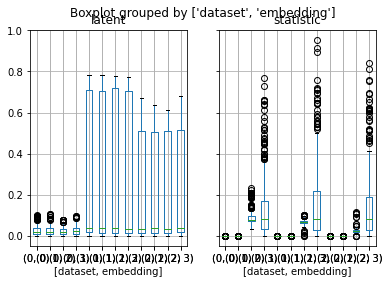

In [ ]:
results.boxplot(by=["dataset", "embedding"])

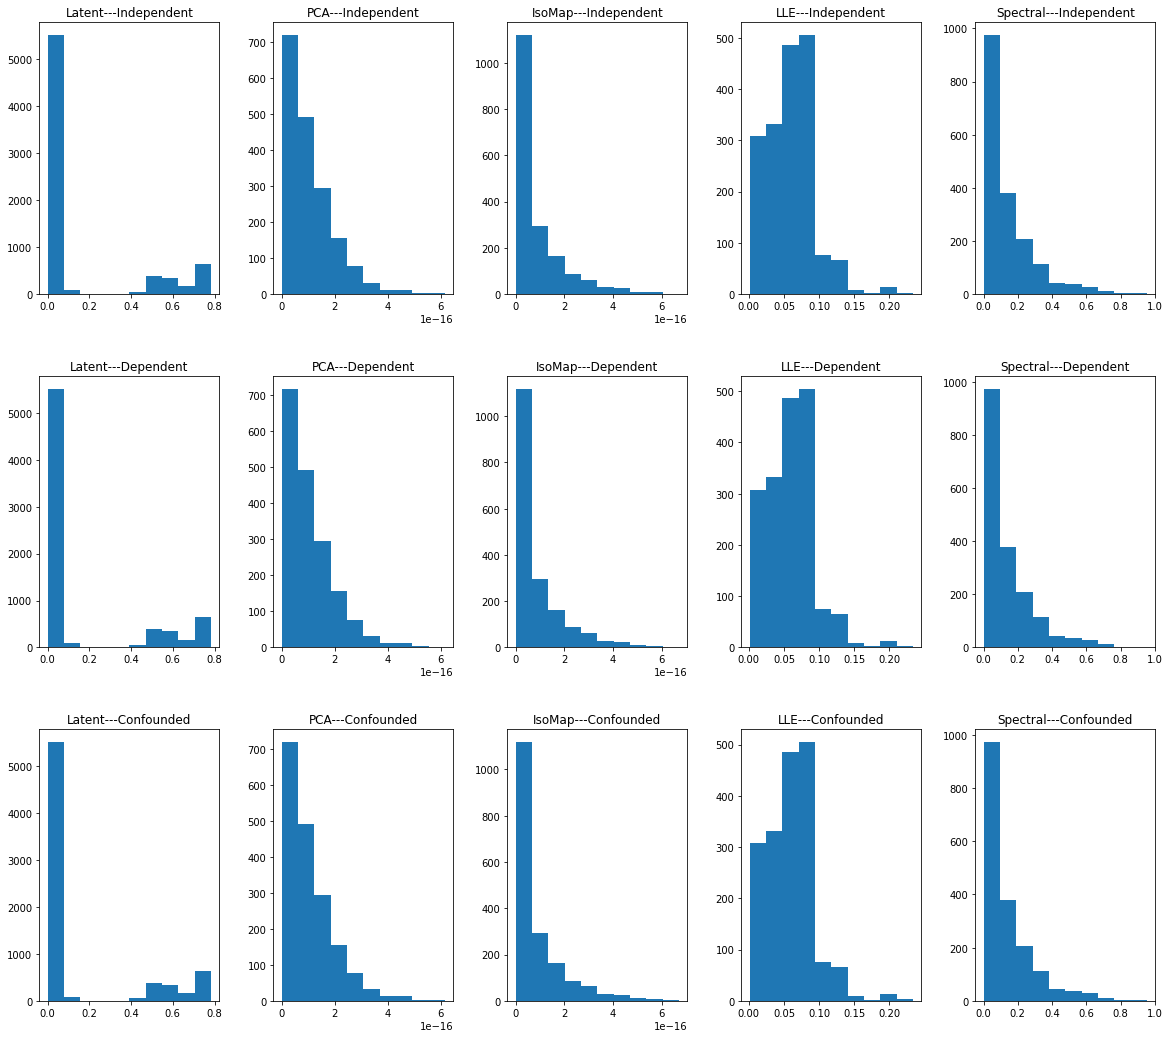

In [ ]:
# axs = results.hist(column="statistic", by=["dataset", "embedding"], figsize=(16,12), layout=(3,5))
# for i, i_p in enumerate(["PCA", "Isomap", "LLE", "Laplacian"]):
#     for j, j_p in enumerate(["Independent", "Dependent", "Confounded"]):
#         axs[j,i+1].set_title(f"{i_p}---{j_p}")
#         axs[j,i+1].set_xlabel("Statistic")
#         axs[j,i+1].set_ylabel("Frequency")

fig, axs = plt.subplots(3,5, figsize=(20,18))

for i, model in enumerate(["Independent", "Dependent", "Confounded"]):
    results.hist("latent", ax=axs[i,0], grid=False)
    axs[i,0].set_title(f"Latent---{model}")
    for j, label in enumerate(["PCA", "IsoMap", "LLE", "Spectral"]):
        results[results["embedding"] == j].hist("statistic", ax=axs[i,j+1], grid=False)
        axs[i,j+1].set_title(f"{label}---{model}")

In [ ]:
# We have some problems with this distribution...

results["all_correct"].describe()

count      7200
unique        2
top       False
freq       4716
Name: all_correct, dtype: object

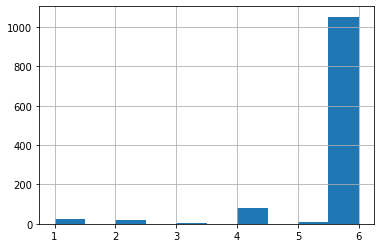

In [ ]:
results[results["independent"] == True].groupby(["dataset", "embedding", "trial"]).count()['x'].hist()

# Same thing with N=10,000

In [ ]:
results10k = pd.DataFrame(columns=[
    "dataset",
    "embedding",
    "trial",
    "x",
    "y",
    "z",
    "statistic",
    "latent",
    "independent",
    "all_correct"
])

N_DIMS = 3
N_NEIGHBORS = 5 # todo: vary this
THRESHOLD = .2

for i, dataset_generator in enumerate([generate_unconfounded, generate_dependent, generate_confounded]):
    # We know something about the independence structure:
    if i < 1:
        true_n_independent = 6
    else:
        true_n_independent = 4
    for k, embedding in enumerate([run_pca, run_isomap, run_lle, run_laplacian]):
        for trial in range(100):
            try:
                # This part is mostly the same as the previous notebook, 'distribution of test statistics'
                print(i,k,trial)

                latent, observable, Y = dataset_generator(10000, n=N_DIMS)
                reduced = embedding(observable, n_neighbors=N_NEIGHBORS, n_dims=N_DIMS)
                trial_results = test_independences(reduced, test=independent, return_statistics=True)
                latent_results = test_independences(latent, test=independent, return_statistics=True)

                # Now we want to test independences
                n_independent = len([1 for result in trial_results if result[3] < THRESHOLD])

                # TODO: add check that we have (x,y | 0) and (x,y | z) as our independences

                for result, latent_result in zip(trial_results):
                    x, y, z, statistic = result
                    _, _, _, latent_statistic = latent_result
                    results10k = results10k.append({
                        "dataset" : i,
                        "embedding" : k,
                        "trial" : trial,
                        "x" : x, "y" : y, "z" : z,
                        "statistic" : statistic,
                        "independent" : statistic < THRESHOLD,
                        "latent" : latent_statistic,
                        "all_correct" : n_independent == true_n_independent
                    }, ignore_index=True)
            # Sometimes math errors happen
            except:
                pass
            

            

0 0 0
0 0 1
0 0 2
0 0 3
0 0 4
0 0 5
0 0 6
0 0 7
0 0 8
0 0 9
0 0 10
0 0 11
0 0 12
0 0 13
0 0 14
0 0 15
0 0 16
0 0 17
0 0 18
0 0 19
0 0 20
0 0 21
0 0 22
0 0 23
0 0 24
0 0 25
0 0 26
0 0 27
0 0 28
0 0 29
0 0 30
0 0 31
0 0 32
0 0 33
0 0 34
0 0 35
0 0 36
0 0 37
0 0 38
0 0 39
0 0 40
0 0 41
0 0 42
0 0 43
0 0 44
0 0 45
0 0 46
0 0 47
0 0 48
0 0 49
0 0 50
0 0 51
0 0 52
0 0 53
0 0 54
0 0 55
0 0 56
0 0 57
0 0 58
0 0 59
0 0 60
0 0 61
0 0 62
0 0 63
0 0 64
0 0 65
0 0 66
0 0 67
0 0 68
0 0 69
0 0 70
0 0 71
0 0 72
0 0 73
0 0 74
0 0 75
0 0 76
0 0 77
0 0 78
0 0 79
0 0 80
0 0 81
0 0 82
0 0 83
0 0 84
0 0 85
0 0 86
0 0 87
0 0 88
0 0 89
0 0 90
0 0 91
0 0 92
0 0 93
0 0 94
0 0 95
0 0 96
0 0 97
0 0 98
0 0 99
0 1 0
0 1 1
0 1 2
0 1 3
0 1 4
0 1 5
0 1 6
0 1 7
0 1 8
0 1 9
0 1 10
0 1 11
0 1 12
0 1 13
0 1 14
0 1 15
0 1 16
0 1 17
0 1 18
0 1 19
0 1 20
0 1 21
0 1 22
0 1 23
0 1 24
0 1 25
0 1 26
0 1 27
0 1 28
0 1 29
0 1 30
0 1 31
0 1 32
0 1 33
0 1 34
0 1 35
0 1 36
0 1 37
0 1 38
0 1 39
0 1 40
0 1 41
0 1 42
0 1 43
0 1 44
0 1 4

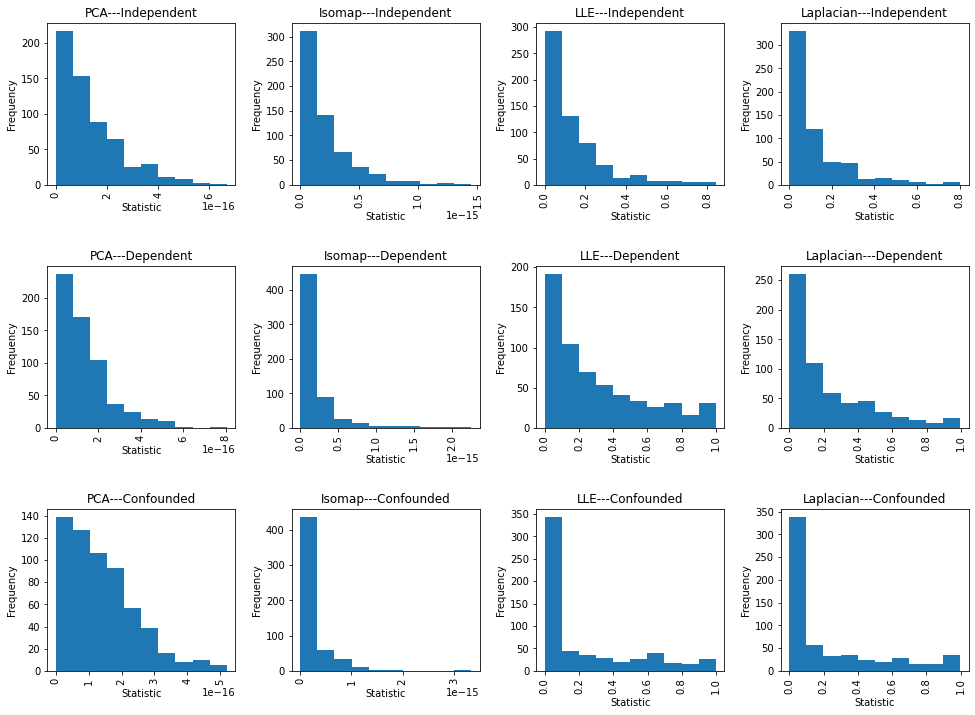

In [ ]:
axs = results100.hist(column="statistic", by=["dataset", "embedding"], figsize=(16,12), layout=(3,4))
for i, i_p in enumerate(["PCA", "Isomap", "LLE", "Laplacian"]):
    for j, j_p in enumerate(["Independent", "Dependent", "Confounded"]):
        axs[j,i].set_title(f"{i_p}---{j_p}")
        axs[j,i].set_xlabel("Statistic")
        axs[j,i].set_ylabel("Frequency")

In [ ]:
results100.to_pickle(f"{DD}/independence_reduced100.pkl")
results100 = pd.read_pickle(f"{DD}/independence_reduced100.pkl")

# Same thing with `scm_large`

In [ ]:
!pip install pycid
from gda_project.utils.scm_large import *


     |████████████████████████████████| 53 kB 2.6 MB/s 
     |████████████████████████████████| 1.9 MB 46.2 MB/s 
  Created wheel for nashpy: filename=nashpy-0.0.21-py3-none-any.whl size=15280 sha256=26b1867f4a254cf2395fa56e252a59fff168ffc5c18162223c85bf7d16c66fe9
  Stored in directory: /root/.cache/pip/wheels/02/08/62/cf4fa931e0a317d180936b266169a57f4bb4eb801465bbe8a1
Successfully built nashpy


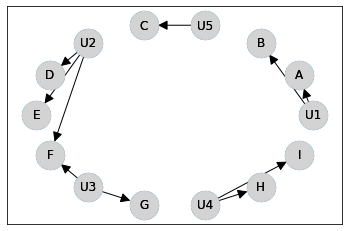

In [ ]:
print_scm_large(1)

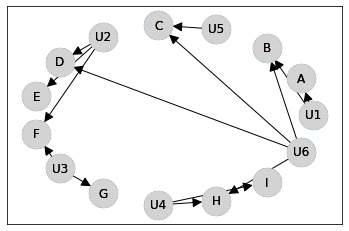

In [ ]:
print_scm_large(2)

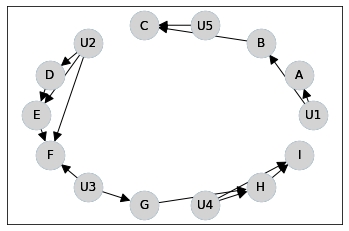

In [ ]:
print_scm_large(3)

In [ ]:
results = pd.DataFrame(columns=[
    "dataset",
    "embedding",
    "trial",
    "x",
    "y",
    "z",
    "statistic",
    "independent",
    "all_correct"
])

N_DIMS = 3
N_NEIGHBORS = 5 # todo: vary this
THRESHOLD = .2

# for i, dataset_generator in enumerate([generate_unconfounded, generate_dependent, generate_confounded]):
# for i in [1,2]:
for i in [1]:
    for trial in range(10):
        latent, observable, Y = scm_large(index=i, N=1000)
        for k, embedding in enumerate([run_pca, run_isomap, run_lle, run_laplacian]):
            try:
                # This part is mostly the same as the previous notebook, 'distribution of test statistics'
                print(i,k,trial)

                # latent, observable, Y = dataset_generator(n=N_DIMS)
                reduced = embedding(observable, n_neighbors=N_NEIGHBORS, n_dims=N_DIMS)
                trial_results = test_independences(reduced, test=independent, return_statistics=True)
                latent_results = test_independences(latent, test=independent, return_statistics=True)

                # Now we want to test independences
                n_independent = len([1 for result in trial_results if result[3] < THRESHOLD])

                # TODO: add check that we have (x,y | 0) and (x,y | z) as our independences

                for result, latent_result in zip(trial_results, latent_results):
                    x, y, z, statistic = result
                    _, _, _, latent_statistic = latent_result
                    results = results.append({
                        "dataset" : i,
                        "embedding" : k,
                        "trial" : trial,
                        "x" : x, "y" : y, "z" : z,
                        "statistic" : statistic,
                        "latent" : latent_statistic,
                        "independent" : statistic < THRESHOLD,
                    }, ignore_index=True)
            # Sometimes math errors happen
            except Exception as e:
                print(e)
            

            

100%|██████████| 100/100 [00:07<00:00, 12.52it/s]


1 0 0


100%|██████████| 9/9 [00:05<00:00,  1.58it/s]


1 1 0


100%|██████████| 9/9 [00:05<00:00,  1.63it/s]


1 2 0


100%|██████████| 9/9 [00:05<00:00,  1.56it/s]


1 3 0


100%|██████████| 100/100 [00:35<00:00,  2.84it/s]


1 0 1


100%|██████████| 9/9 [00:05<00:00,  1.60it/s]


1 1 1


100%|██████████| 9/9 [00:05<00:00,  1.56it/s]


1 2 1


100%|██████████| 9/9 [00:05<00:00,  1.62it/s]


1 3 1


100%|██████████| 100/100 [00:06<00:00, 15.54it/s]


1 0 2


100%|██████████| 9/9 [00:05<00:00,  1.69it/s]


1 1 2


100%|██████████| 9/9 [00:05<00:00,  1.61it/s]


1 2 2


100%|██████████| 9/9 [00:05<00:00,  1.64it/s]


1 3 2


100%|██████████| 100/100 [00:06<00:00, 16.09it/s]


1 0 3


100%|██████████| 9/9 [00:05<00:00,  1.68it/s]


1 1 3


100%|██████████| 9/9 [00:05<00:00,  1.61it/s]


1 2 3


100%|██████████| 9/9 [00:05<00:00,  1.67it/s]


1 3 3


100%|██████████| 100/100 [00:06<00:00, 15.77it/s]


1 0 4


100%|██████████| 9/9 [00:05<00:00,  1.68it/s]


1 1 4


100%|██████████| 9/9 [00:05<00:00,  1.68it/s]


1 2 4


100%|██████████| 9/9 [00:05<00:00,  1.69it/s]


1 3 4


100%|██████████| 100/100 [00:07<00:00, 12.98it/s]


1 0 5


100%|██████████| 9/9 [00:05<00:00,  1.63it/s]


1 1 5


100%|██████████| 9/9 [00:05<00:00,  1.67it/s]


1 2 5


100%|██████████| 9/9 [00:05<00:00,  1.61it/s]


1 3 5


100%|██████████| 100/100 [00:07<00:00, 13.74it/s]


1 0 6


100%|██████████| 9/9 [00:05<00:00,  1.65it/s]


1 1 6


100%|██████████| 9/9 [00:05<00:00,  1.68it/s]


1 2 6


100%|██████████| 9/9 [00:05<00:00,  1.68it/s]


1 3 6


100%|██████████| 100/100 [00:13<00:00,  7.32it/s]


1 0 7


100%|██████████| 9/9 [00:05<00:00,  1.67it/s]


1 1 7


100%|██████████| 9/9 [00:05<00:00,  1.68it/s]


1 2 7


100%|██████████| 9/9 [00:05<00:00,  1.70it/s]


1 3 7


100%|██████████| 100/100 [00:12<00:00,  8.18it/s]


1 0 8


100%|██████████| 9/9 [00:05<00:00,  1.65it/s]


1 1 8


100%|██████████| 9/9 [00:05<00:00,  1.64it/s]


1 2 8


100%|██████████| 9/9 [00:05<00:00,  1.63it/s]


1 3 8


100%|██████████| 100/100 [00:15<00:00,  6.27it/s]


1 0 9


100%|██████████| 9/9 [00:05<00:00,  1.61it/s]


1 1 9


100%|██████████| 9/9 [00:05<00:00,  1.59it/s]


1 2 9


100%|██████████| 9/9 [00:05<00:00,  1.64it/s]


1 3 9


100%|██████████| 9/9 [00:05<00:00,  1.62it/s]


In [ ]:
results.to_pickle(f"{DD}large_scm_stats.pkl")

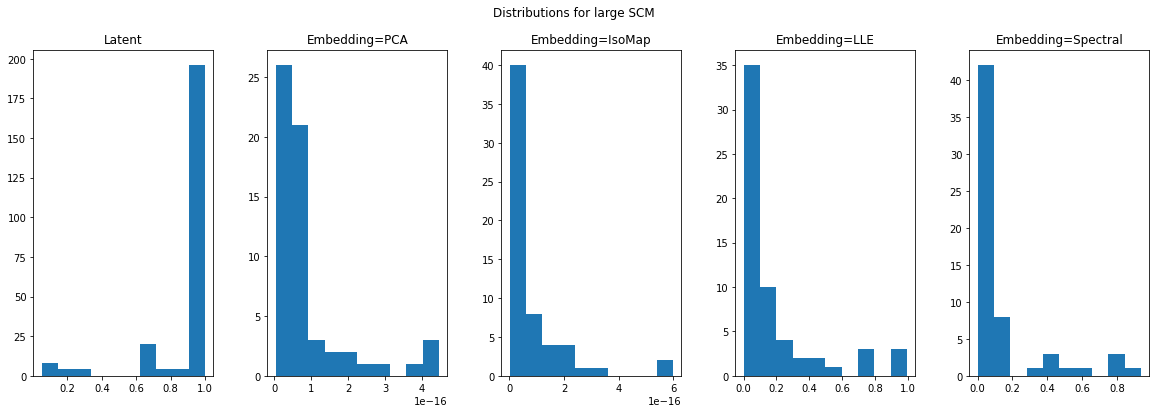

In [ ]:
fig, axs = plt.subplots(1,5, figsize=(20,6))

fig.suptitle("Distributions for large SCM")
results.hist("latent", ax=axs[0], grid=False)
axs[0].set_title("Latent")
for i, label in enumerate(["PCA", "IsoMap", "LLE", "Spectral"]):
    results[results["embedding"] == i].hist("statistic", ax=axs[i+1], grid=False)
    axs[i+1].set_title(f"Embedding={label}")

# Final figure for paper

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


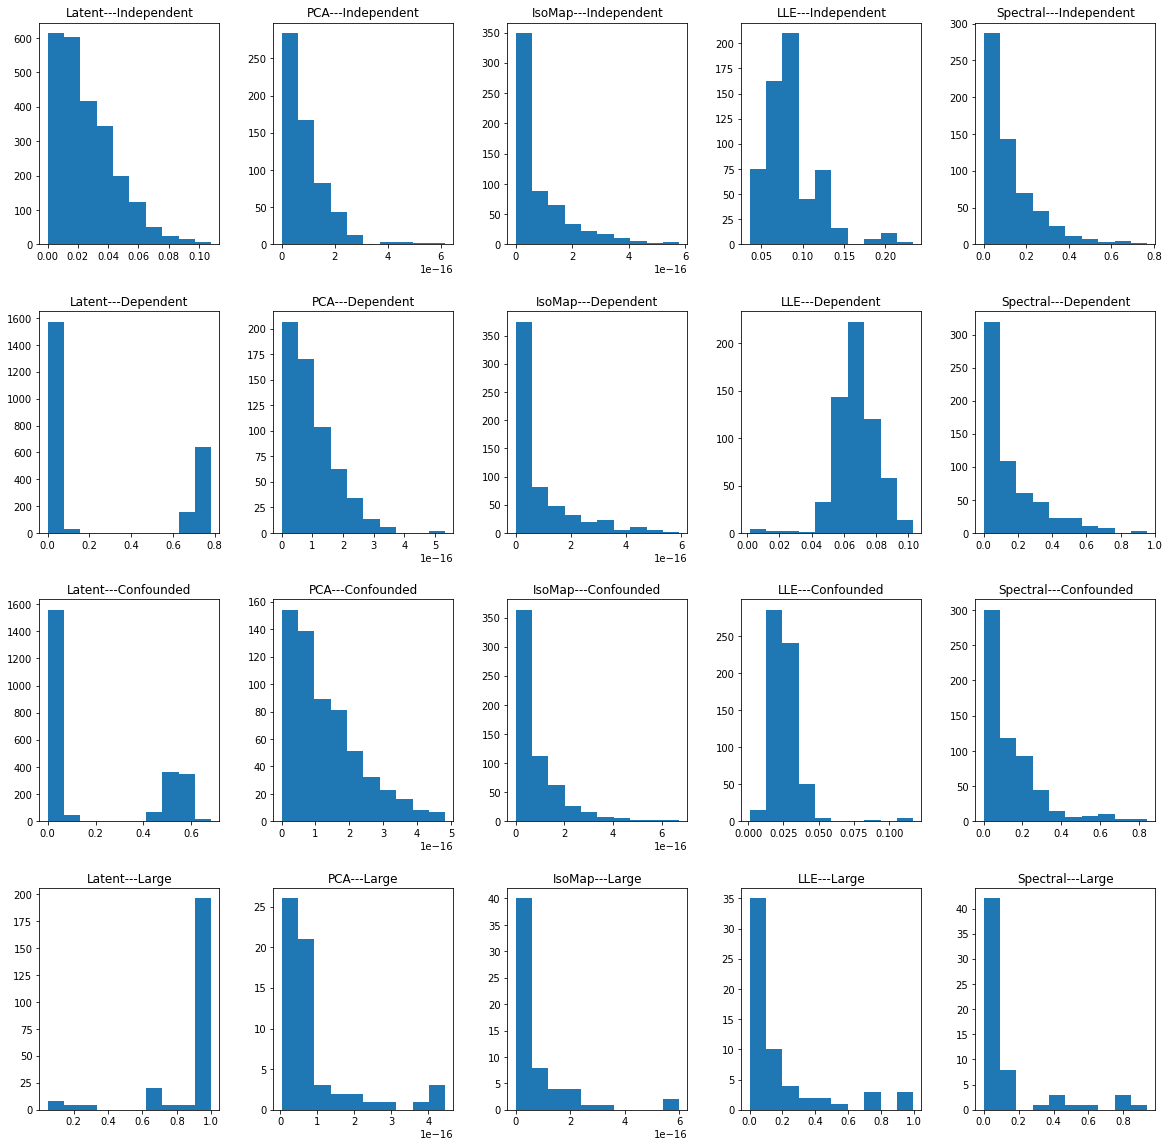

In [ ]:
results_large = pd.read_pickle(f"{DD}large_scm_stats.pkl")

fig, axs = plt.subplots(4,5, figsize=(20,20))

for i, model in enumerate(["Independent", "Dependent", "Confounded", "Large"]):
    if i < 3:
        to_use = results
    else:
        to_use = results_large
        to_use["dataset"] = 3 # Hacky
    
    to_use[to_use["dataset"] == i].hist("latent", ax=axs[i,0], grid=False)
    axs[i,0].set_title(f"Latent---{model}")

    for j, label in enumerate(["PCA", "IsoMap", "LLE", "Spectral"]):
        to_use[to_use["embedding"] == j][to_use["dataset"] == i].hist("statistic", ax=axs[i,j+1], grid=False)
        axs[i,j+1].set_title(f"{label}---{model}")


In [ ]:
results_large

,dataset,embedding,trial,x,y,z,statistic,independent,all_correct,latent
0,1,0,0,1,0,(),4.413137e-17,True,NaN,0.994880
1,1,0,0,1,0,"(2,)",3.497203e-17,True,NaN,0.049551
2,1,0,0,2,0,(),3.330669e-17,True,NaN,0.994876
3,1,0,0,2,0,"(1,)",1.609823e-17,True,NaN,0.994876
4,1,0,0,2,1,(),1.065814e-16,True,NaN,0.994880
...,...,...,...,...,...,...,...,...,...,...
235,1,3,9,1,0,"(2,)",1.708619e-01,True,NaN,0.969814
236,1,3,9,2,0,(),2.216012e-03,True,NaN,1.000000
237,1,3,9,2,0,"(1,)",2.081498e-03,True,NaN,1.000000
238,1,3,9,2,1,(),9.664092e-04,True,NaN,1.000000
